# Census Income Project

Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# To Import the required Libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [110]:
from imblearn.over_sampling import SMOTE

# Load the Dataset

In [111]:
#loading the dataset
df = pd.read_csv("census_income.csv")
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

# Data Preprocessing

In [112]:
# checking the first 5 values of the data set
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [113]:
# checking the last 5 values of the data set
df.tail()

Age      Workclass  Fnlwgt    Education  Education_num  \
32555   27        Private  257302   Assoc-acdm             12   
32556   40        Private  154374      HS-grad              9   
32557   58        Private  151910      HS-grad              9   
32558   22        Private  201490      HS-grad              9   
32559   52   Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation Relationship    Race      Sex  \
32555   Married-civ-spouse        Tech-support         Wife   White   Female   
32556   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32557              Widowed        Adm-clerical    Unmarried   White   Female   
32558        Never-married        Adm-clerical    Own-child   White     Male   
32559   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
32555             0             0              38   United-States   <=50K  
32556             0             0              40   United-States    >50K  
32557             0             0              40   United-States   <=50K  
32558             0             0              20   United-States   <=50K  
32559         15024             0              40   United-States    >50K

In [114]:
# checking the any 10 sample values of the data set
df.sample(10)

Age   Workclass  Fnlwgt    Education  Education_num  \
25484   20     Private  228649      HS-grad              9   
26007   34     Private  261418      HS-grad              9   
16064   23           ?  154921      5th-6th              3   
27175   52     Private   99184      HS-grad              9   
30672   20           ?  122244      HS-grad              9   
3716    29     Private  194197    Bachelors             13   
24037   28     Private  141957   Assoc-acdm             12   
1862    25     Private  176520      HS-grad              9   
29452   18     Private  324011          9th              5   
11623   49   Local-gov  184428      Masters             14   

            Marital_status         Occupation     Relationship    Race  \
25484        Never-married      Other-service        Own-child   White   
26007   Married-civ-spouse      Other-service          Husband   White   
16064        Never-married                  ?    Not-in-family   White   
27175             Divorced   Transport-moving    Not-in-family   White   
30672        Never-married                  ?    Not-in-family   White   
3716         Never-married    Exec-managerial        Own-child   White   
24037   Married-civ-spouse       Tech-support          Husband   White   
1862         Never-married       Craft-repair   Other-relative   White   
29452        Never-married    Farming-fishing        Own-child   White   
11623   Married-civ-spouse       Adm-clerical          Husband   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
25484     Male             0             0              40   United-States   
26007     Male             0             0              40   United-States   
16064     Male             0             0              50   United-States   
27175     Male             0             0              40   United-States   
30672   Female             0             0              28   United-States   
3716      Male             0             0              40   United-States   
24037     Male             0          1887              70   United-States   
1862      Male             0             0              40   United-States   
29452     Male             0             0              20   United-States   
11623     Male             0             0              40   United-States   

       Income  
25484   <=50K  
26007   <=50K  
16064   <=50K  
27175   <=50K  
30672   <=50K  
3716    <=50K  
24037    >50K  
1862    <=50K  
29452   <=50K  
11623   <=50K

In [115]:

print("Columns :",df.columns) #checking the columns or features names
print("shape:", df.shape) #checking the size of the datasets( rows and columns)
print("info:", df.info()) #checking the info( datatypes of columns, null or not null)
print("data types:", df.dtypes) # checking the datatypes of the columns

Columns : Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')
shape: (32560, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  i

In [116]:
df.isnull().sum() #checking the null values in columns

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

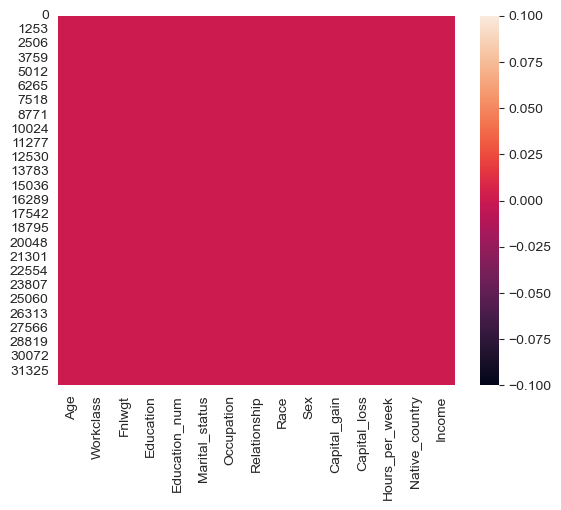

In [117]:
sns.heatmap(df.isnull()) # #checking the null values in columns by using heatmap 

In [118]:
df.nunique().to_frame("no. of unique values")  # no. of unique values in all columns of the Dataframe

no. of unique values
Age                               73
Workclass                          9
Fnlwgt                         21647
Education                         16
Education_num                     16
Marital_status                     7
Occupation                        15
Relationship                       6
Race                               5
Sex                                2
Capital_gain                     119
Capital_loss                      92
Hours_per_week                    94
Native_country                    42
Income                             2

In [119]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64


Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool       

by checking the value counts, we got know that 3 columns(Workclass,Occupation and Native_country) having the missing data and our target variable (Income) have discrete data (having only 2 values count) so this is classification type.

In [120]:
# replacing '?' np.nan
df= df.replace(' ?',np.nan)

In [121]:
# again checking the null values
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [122]:
#3 columns have null values: Workclass,Occupation and Native_country
#Filling the null values
df['Workclass']=df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native_country']=df['Native_country'].fillna(df['Native_country'].mode()[0])

In [123]:
# checking the duplicate values
df.duplicated().sum()

24

In [124]:
duplicated_rows = df.duplicated()
print(df[duplicated_rows])

       Age          Workclass  Fnlwgt      Education  Education_num  \
4880    25            Private  308144      Bachelors             13   
5103    90            Private   52386   Some-college             10   
9170    21            Private  250051   Some-college             10   
11630   20            Private  107658   Some-college             10   
13083   25            Private  195994        1st-4th              2   
15058   21            Private  243368      Preschool              1   
17039   46            Private  173243        HS-grad              9   
18554   30            Private  144593        HS-grad              9   
18697   19            Private   97261        HS-grad              9   
21317   19            Private  138153   Some-college             10   
21489   19            Private  146679   Some-college             10   
21874   49            Private   31267        7th-8th              4   
22299   25            Private  195994        1st-4th              2   
22366 

In [125]:
#dropping the duplicated row from the dataset
df.drop_duplicates(inplace=True)

In [126]:
# again checking the no. of unique values in all columns of the Dataframe
df.nunique().to_frame("no. of unique values")

no. of unique values
Age                               73
Workclass                          8
Fnlwgt                         21647
Education                         16
Education_num                     16
Marital_status                     7
Occupation                        14
Relationship                       6
Race                               5
Sex                                2
Capital_gain                     119
Capital_loss                      92
Hours_per_week                    94
Native_country                    41
Income                             2

In [127]:
# again checking the duplicate values
df.duplicated().sum()

0

In [128]:
#seperating the numerical and categorical columns
#Categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns:",categorical_col)
print("\n")

categorical columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']




In [129]:
#Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns:",numerical_col)
print("\n")

numerical columns: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']




# Data Cleansing

In [130]:
# checking the no. of zeros in each columns of dataframe

(df == 0).sum()

Age                   0
Workclass             0
Fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      29825
Capital_loss      31017
Hours_per_week        0
Native_country        0
Income                0
dtype: int64

In [131]:
# after removing the duplicate rows
df.shape

(32536, 15)

In [132]:
#dropping the "Capital_gain" and "Capital_loss" because of 91.6% capital_gain and 95.3% capital_loss having the zero values

df.drop(["Capital_gain"],axis=1,inplace=True)
df.drop(["Capital_loss"],axis=1,inplace=True)

In [133]:
#after dropping the 2 columns
df.shape

(32536, 13)

# Feature Engineering

In [134]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


Fnlwgt
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: count, Length: 21647, dtype: int64


Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: i

In [135]:
df['Workclass']=df['Workclass'].replace([' Without-pay',' Never-worked'],'Unemployed')
df['Workclass']=df['Workclass'].replace([' State-gov',' Local-gov',' Federal-gov'],'Government')
df['Workclass']=df['Workclass'].replace([' Self-emp-not-inc',' Self-emp-inc'],'SelfEmployed')

In [136]:
df['Workclass'].value_counts()

Workclass
 Private        24509
Government       4350
SelfEmployed     3656
Unemployed         21
Name: count, dtype: int64

In [137]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [138]:
df['Education'].value_counts()

Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64

In [139]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [140]:
df['Marital_status']=df['Marital_status'].replace([' Married-civ-spouse',' Married-AF-spouse'],'Married')
df['Marital_status']=df['Marital_status'].replace([' Divorced',' Separated', ' Married-spouse-absent',' Widowed'],'Single')
df['Marital_status']=df['Marital_status'].replace([' Never-married'],'UnMarried')

In [141]:
df['Marital_status'].value_counts()

Marital_status
Married      14993
UnMarried    10666
Single        6877
Name: count, dtype: int64

# Exploratory Data Analysis: 

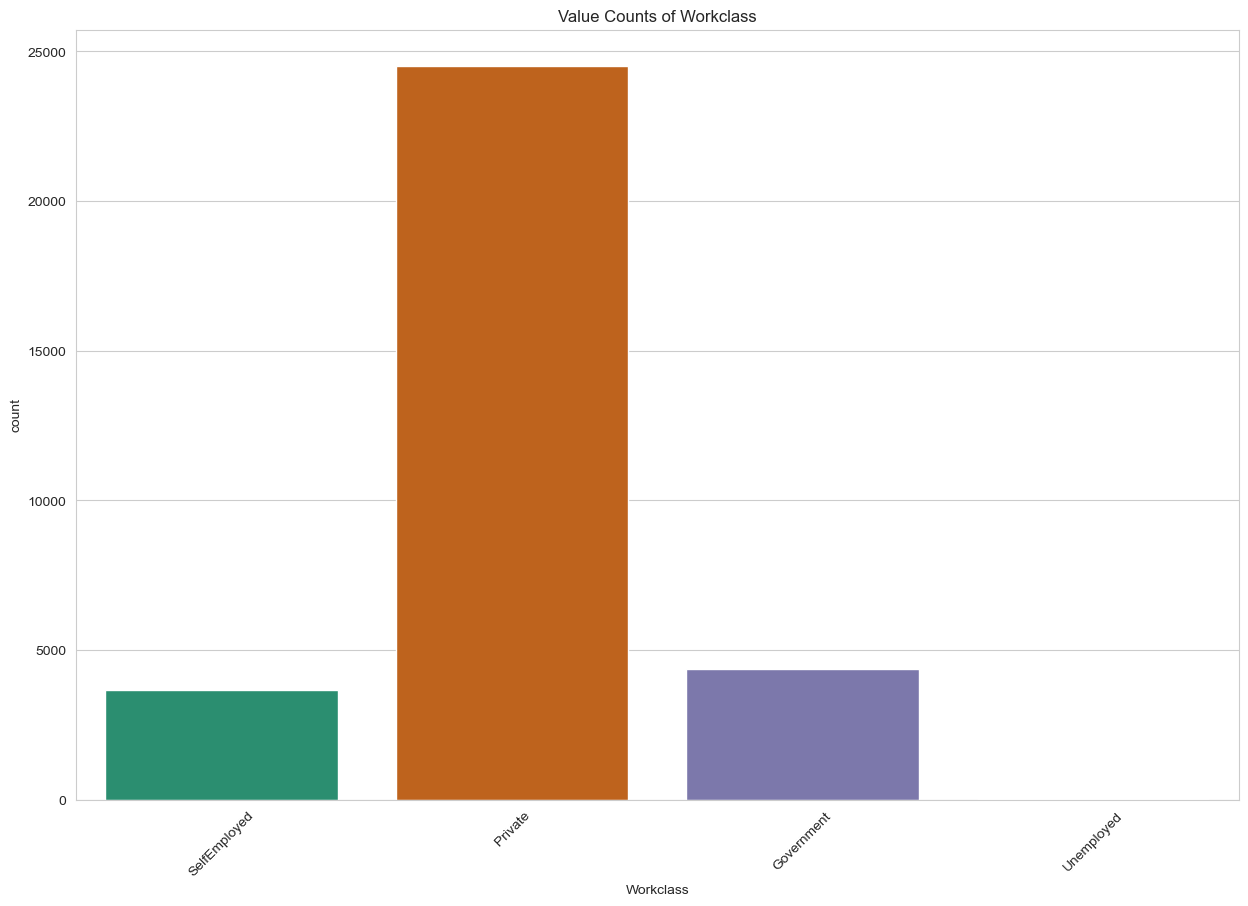

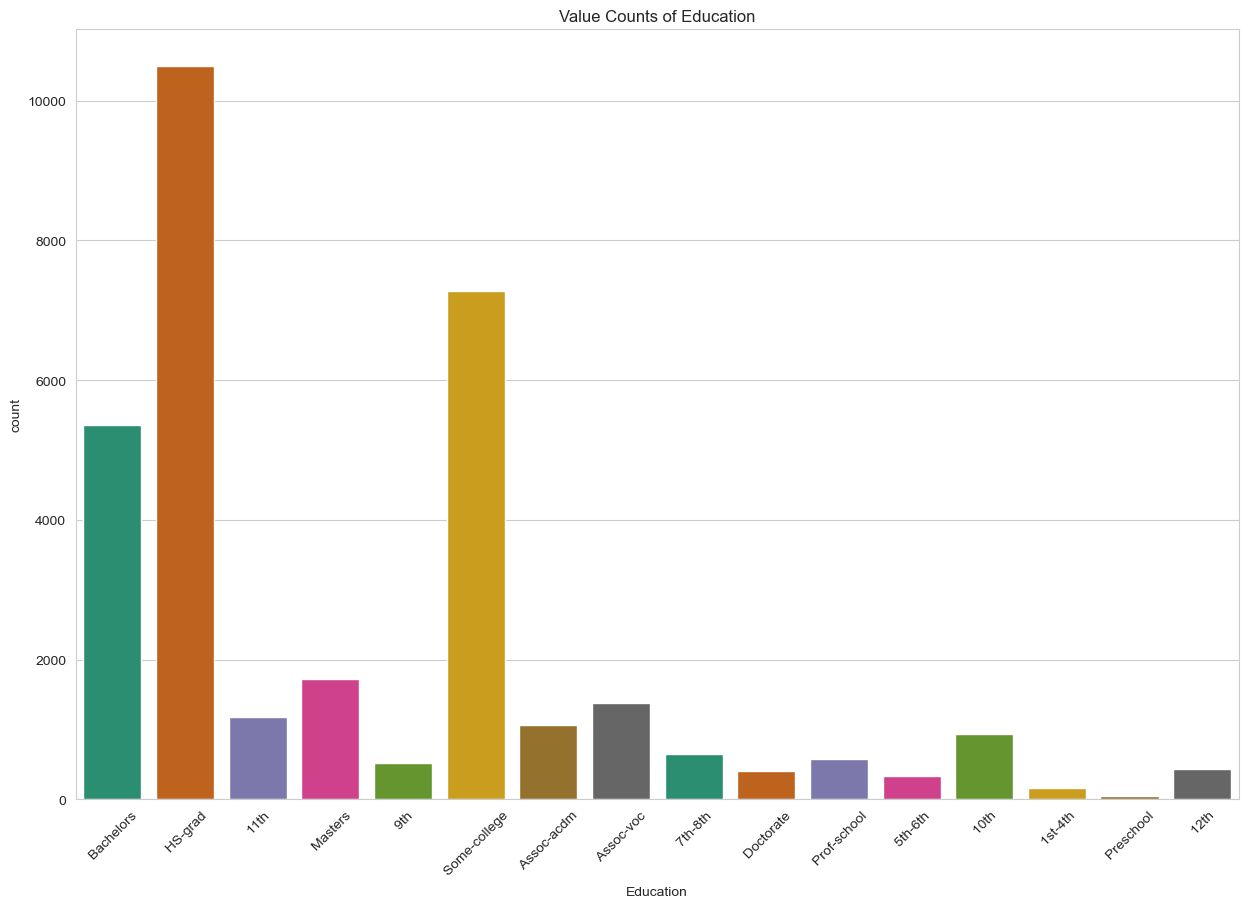

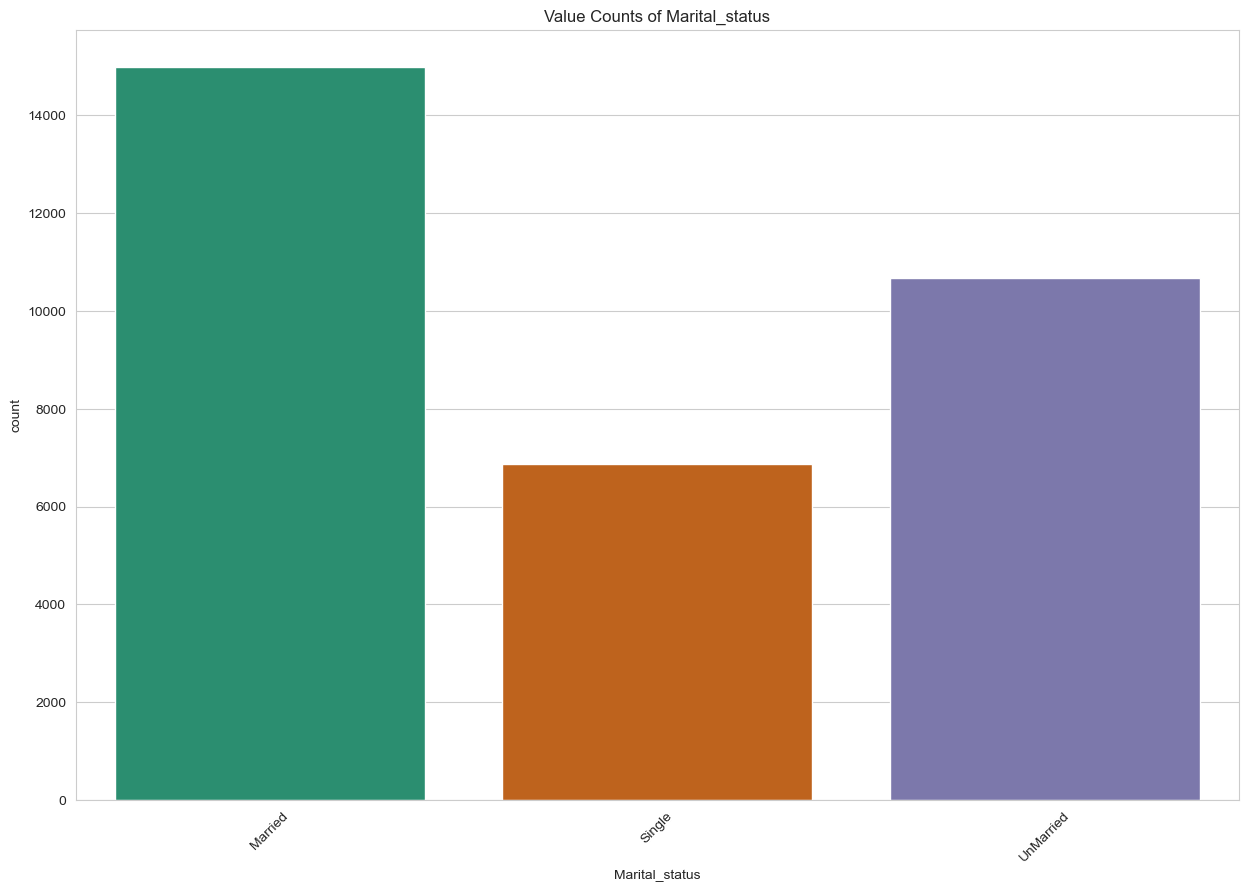

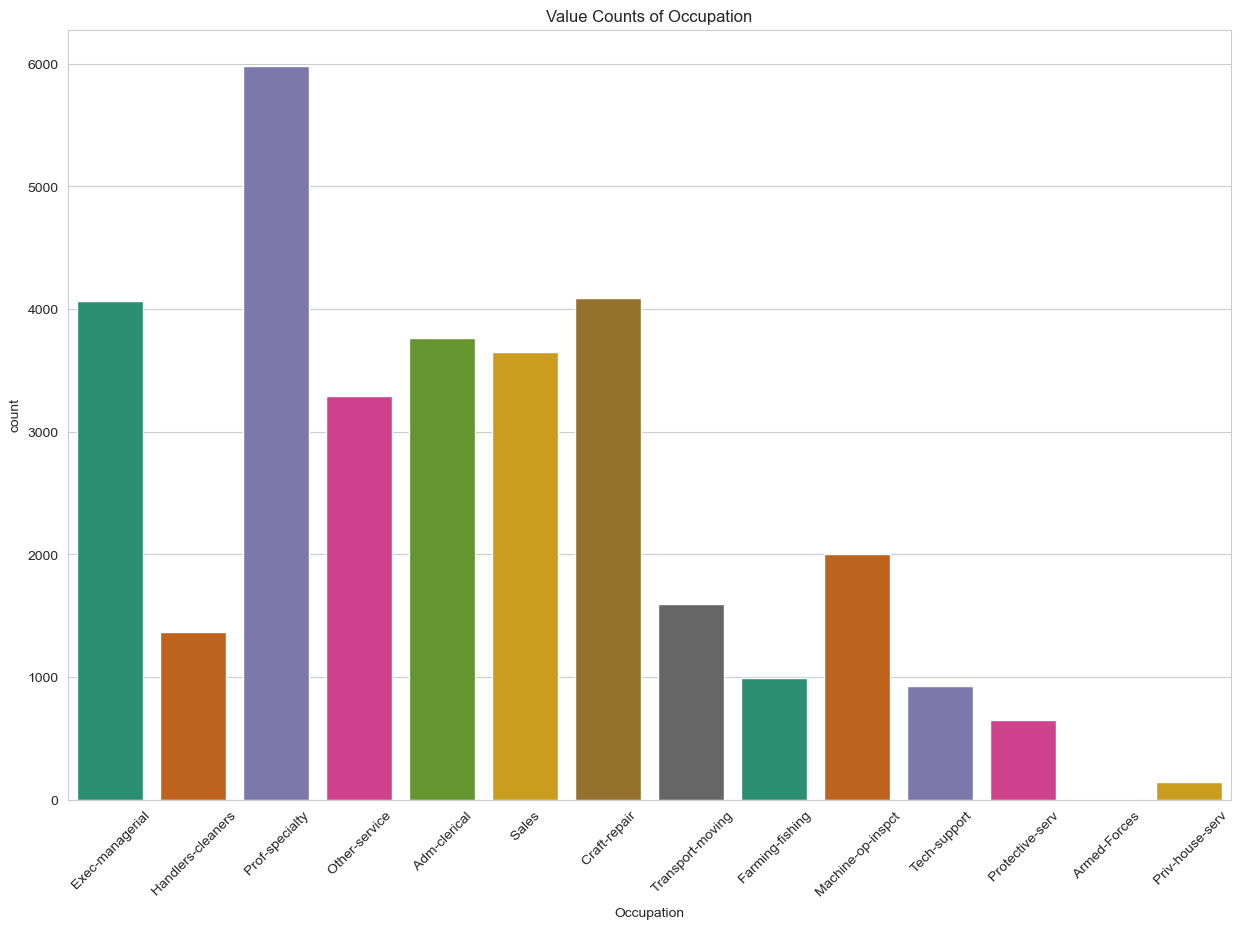

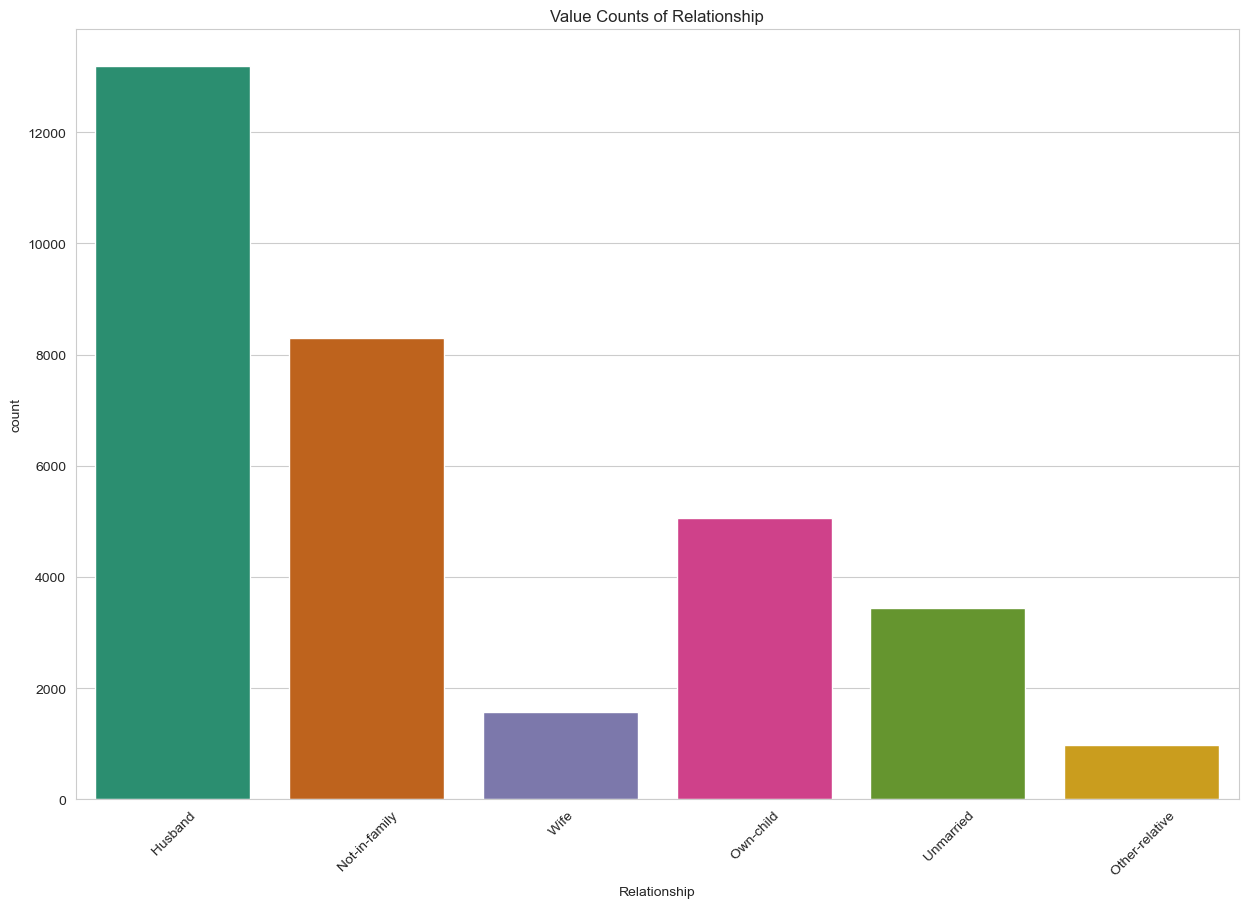

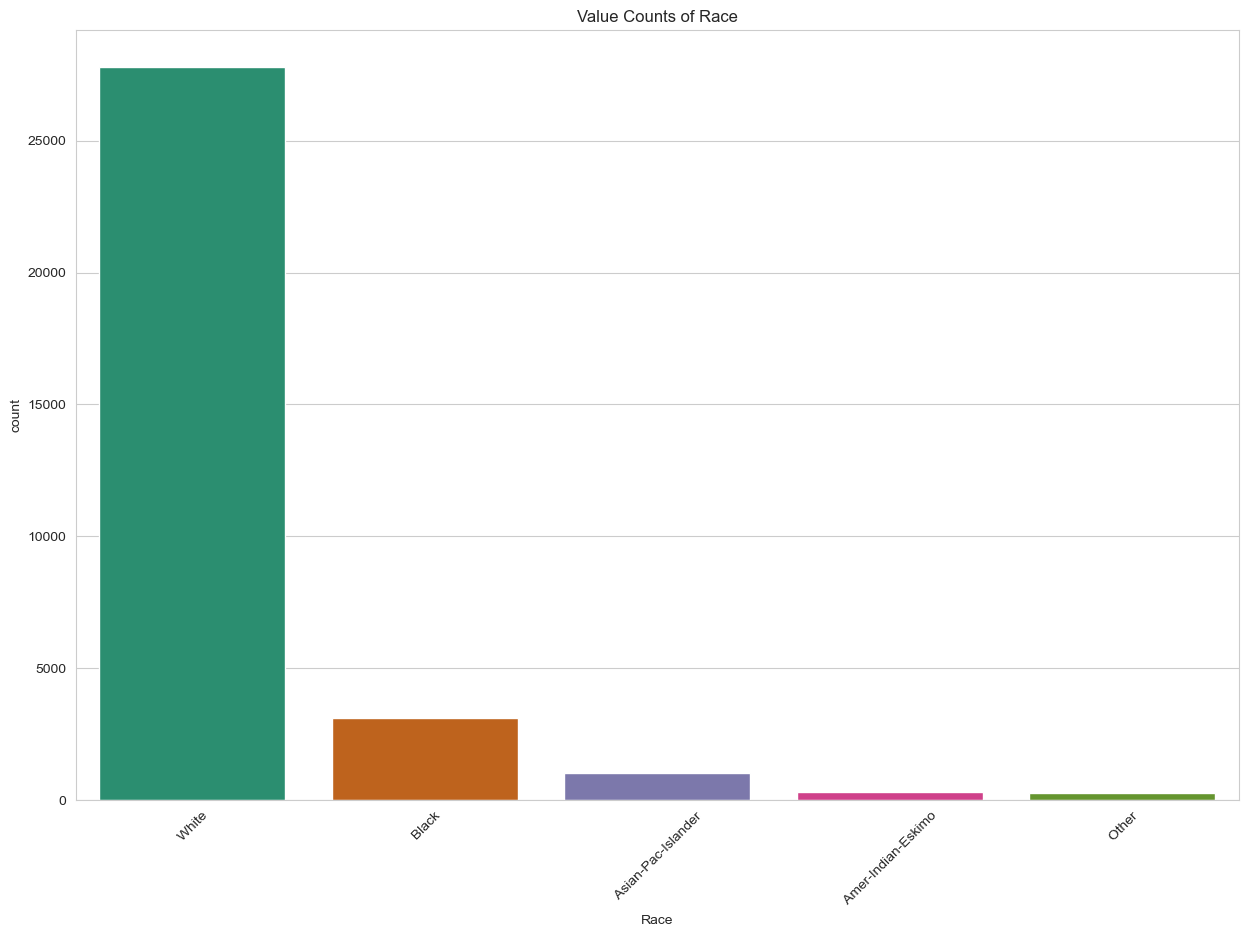

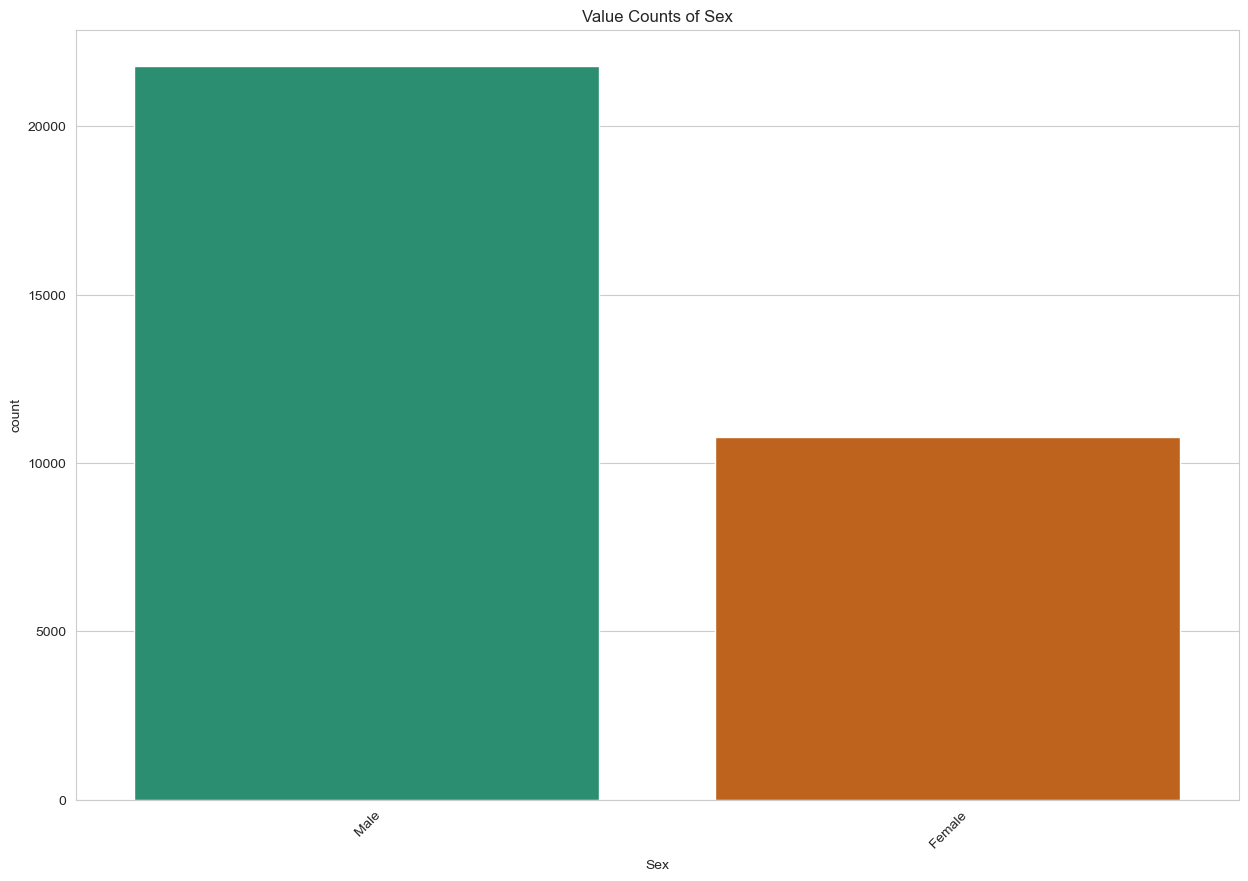

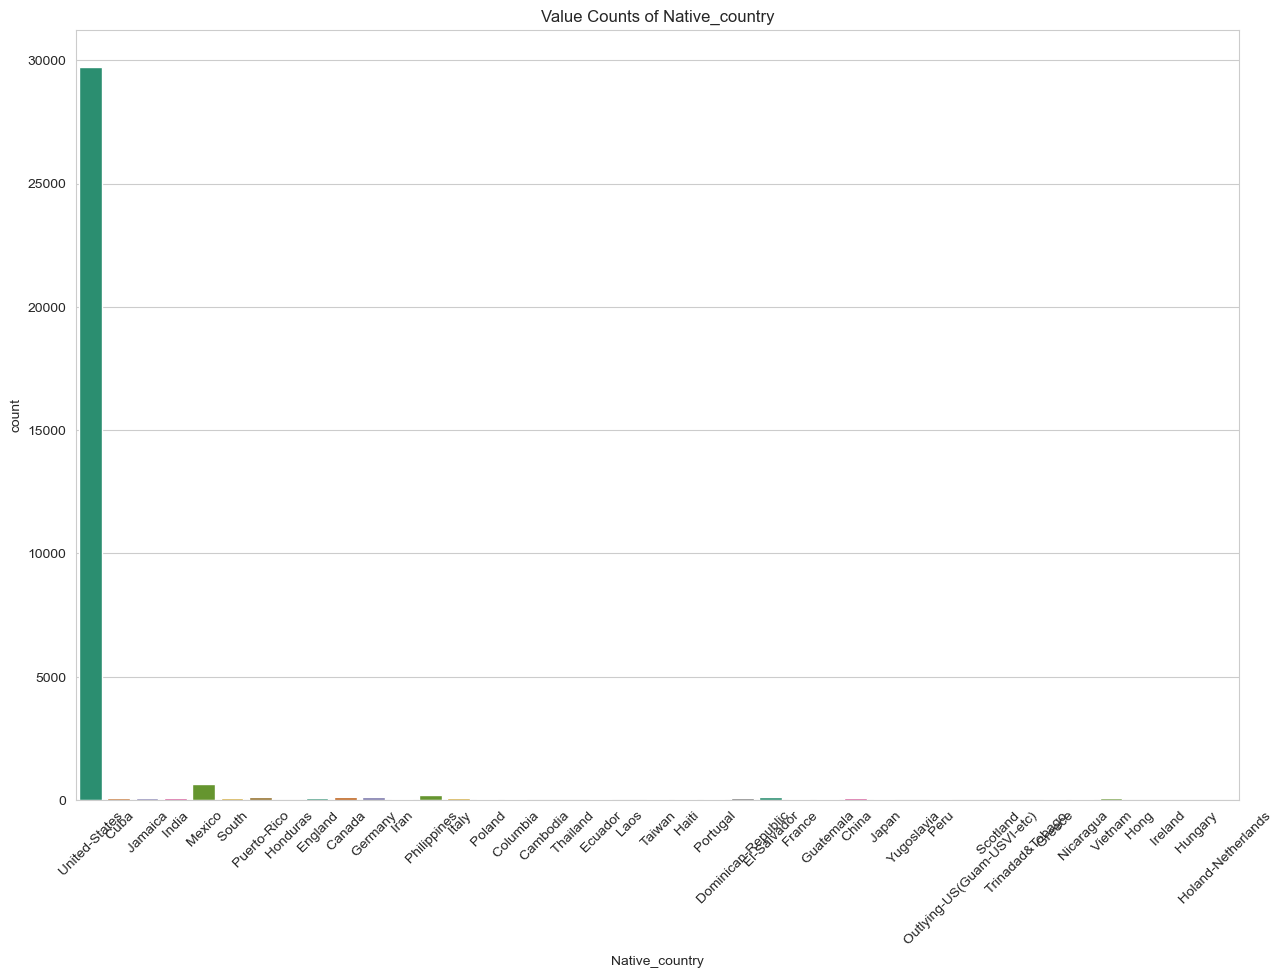

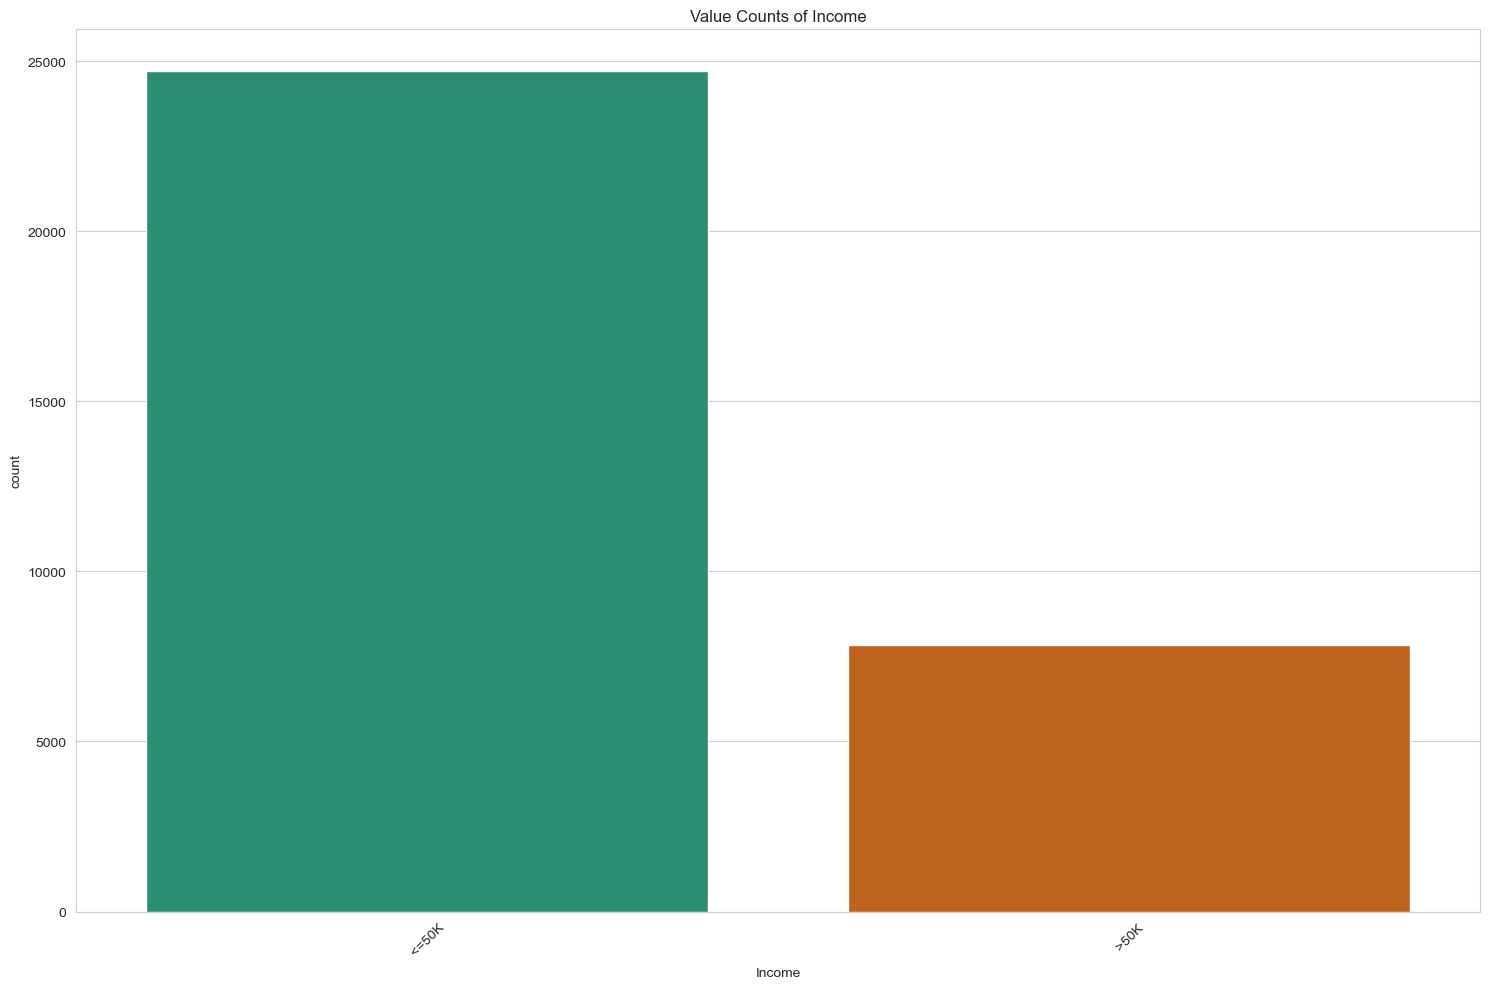

In [142]:
for i in categorical_col:
        sns.set_style('whitegrid')
        plt.figure(figsize=(15,10))
        sns.countplot(x=i, data=df,palette='Dark2')
        plt.title(f'Value Counts of {i}')
        plt.xticks(rotation=45)
        plt.xlabel(i)
plt.tight_layout()
plt.show()

Observations:

Workclass - Mostly person worked in private sector as compared to other sectors.

Education - Majority of persons are atleast 12th passout in education than others.

Marital-status - The person who married are more compare than the persons who not-married. The count of single persons is above 6000.

Occupation - The count of individuals working as a Prof-specialty is higest in the data followed by individuals working as a Craft-repair > Exec-managerial > Adm-clerical > Sales > Other-service.

Relationship - Males as husband is approx. 13200 followed by personss not-in-family as compared to other individual's relationship.

Race - The no of white persons are highest.

Sex - The number of females are almost half of the males.

Native-country - Mostly persons belongs to United-States.

Income - The majority of persons have income >=50k.

<Axes: xlabel='Education_num', ylabel='count'>

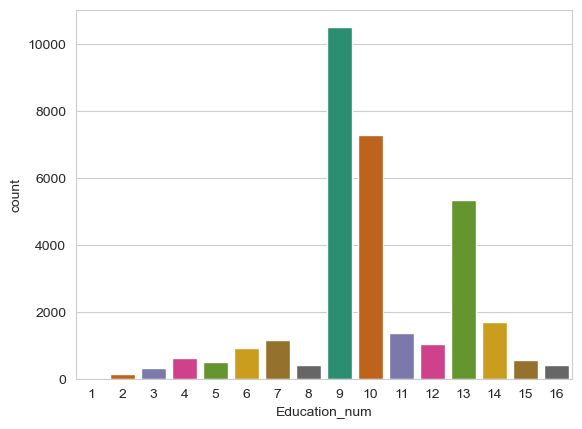

In [143]:
sns.countplot(x='Education_num',data=df,palette='Dark2')

Observations: We have dropped the education feature Which is a duplicate feature of education_num.
The matching education level of the education number:

1: Preschool, 2: 1st-4th, 3: 5th-6th, 4: 7th-8th, 5: 9th, 6: 10th, 7: 11th, 8: 12th, 9: HS-grad,

10: Some-college, 11: Assoc-voc, 12: Assoc-acdm, 13: Bachelors, 14: Masters, 15: Prof-school, 16: Doctorate

In [144]:
# drop Education column
df.drop('Education', inplace=True, axis=1)

<Axes: xlabel='Income', ylabel='Age'>

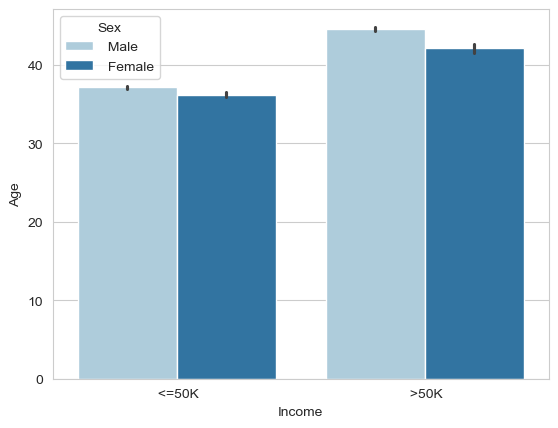

In [145]:
sns.barplot(x = 'Income', y = 'Age', hue = 'Sex', data=df,palette='Paired')

Observation: Males whose age has higher than average age have >50K income than females

<Axes: title={'center': 'Distribution of Income V/s Age'}, xlabel='Age', ylabel='count'>

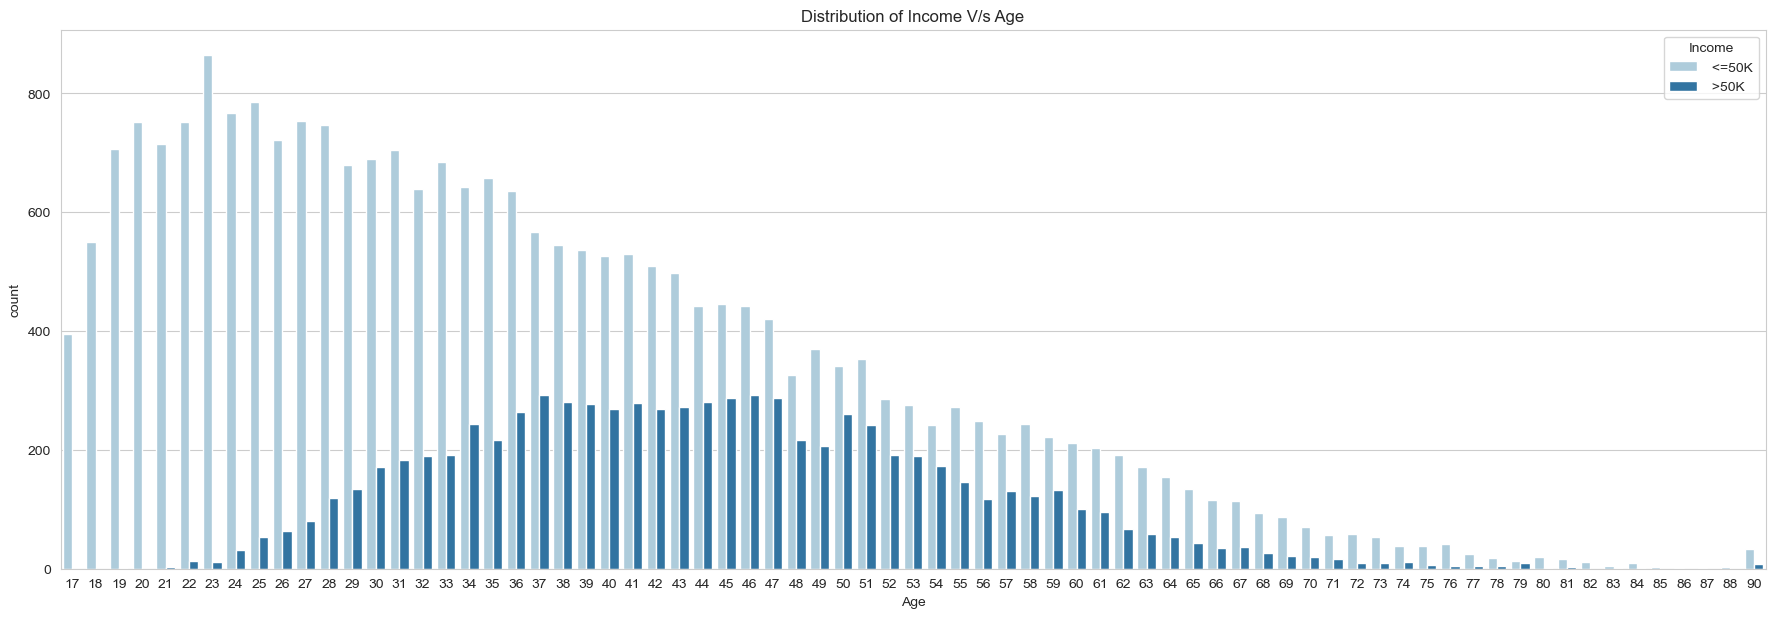

In [146]:
plt.figure(figsize=(22,7))
plt.title('Distribution of Income V/s Age')
sns.countplot(x='Age', hue='Income', data = df, palette='Paired')

Observation: 1.The count of individuals decreases with age. The younger age groups (late teens to early 30s) have higher counts compared to the older age groups.

2.younger individuals(particularly between ages 19 to 28) are more likely to earn <=50K, while those in their middle ages (30-55) have a higher likelihood of earning >50K. 

3.The overall trend shows a decrease in counts for both income categories as age increases, with a sharper decline in the higher income category in older age groups.

<Axes: title={'center': 'Distribution of Income V/s Workclass'}, xlabel='Workclass', ylabel='count'>

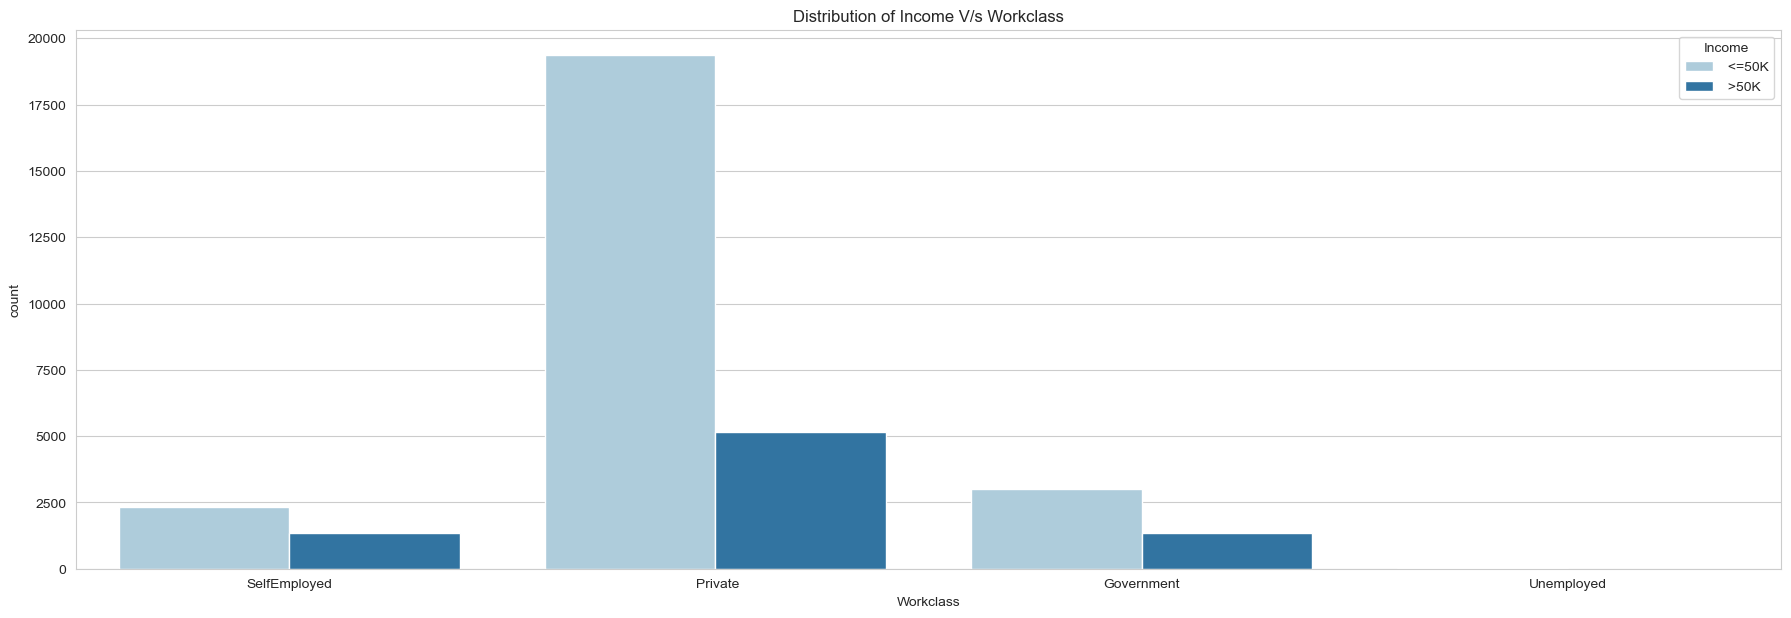

In [147]:
plt.figure(figsize=(22,7))
plt.title('Distribution of Income V/s Workclass')
sns.countplot(x='Workclass', hue='Income', data = df, palette="Paired")

Observation:The Private sector has the highest number of individuals whose earning <=50K in majority compared to other work classes.

<Axes: title={'center': 'Distribution of Income V/s Education_num'}, xlabel='Education_num', ylabel='count'>

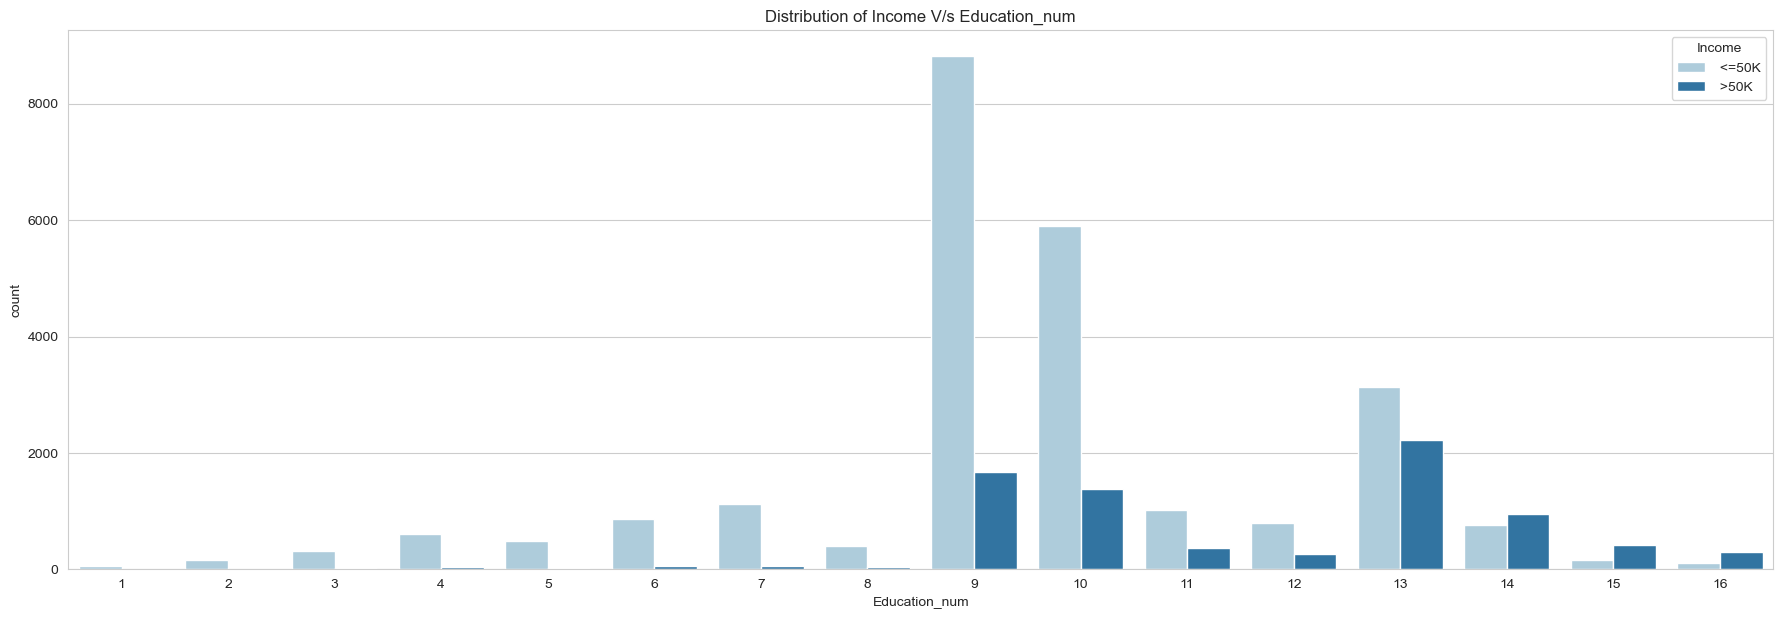

In [148]:
plt.figure(figsize=(22,7))
plt.title('Distribution of Income V/s Education_num')
sns.countplot(x='Education_num', hue='Income', data = df, palette="Paired")

1: Preschool, 2: 1st-4th, 3: 5th-6th, 4: 7th-8th, 5: 9th, 6: 10th, 7: 11th, 8: 12th, 9: HS-grad,
10: Some-college, 11: Assoc-voc, 12: Assoc-acdm, 13: Bachelors, 14: Masters, 15: Prof-school, 16: Doctorate

Observations:
1.Preschool to 8th Grade: Predominantly earn <=50K with very few individuals earning >50K.

2.9th Grade to Some College: Majority earn <=50K, but the proportion of individuals earning >50K increases, especially from 10th grade onwards.

3.Associate Degrees to Doctorate: Higher likelihood of earning >50K, with Bachelor's and higher degrees showing a significant number of individuals in the >50K category. Bachelor's degree is the peak for higher income, followed by Master's, Professional School, and Doctorate degrees.

<Axes: title={'center': 'Distribution of Income V/s Marital_status'}, xlabel='Marital_status', ylabel='count'>

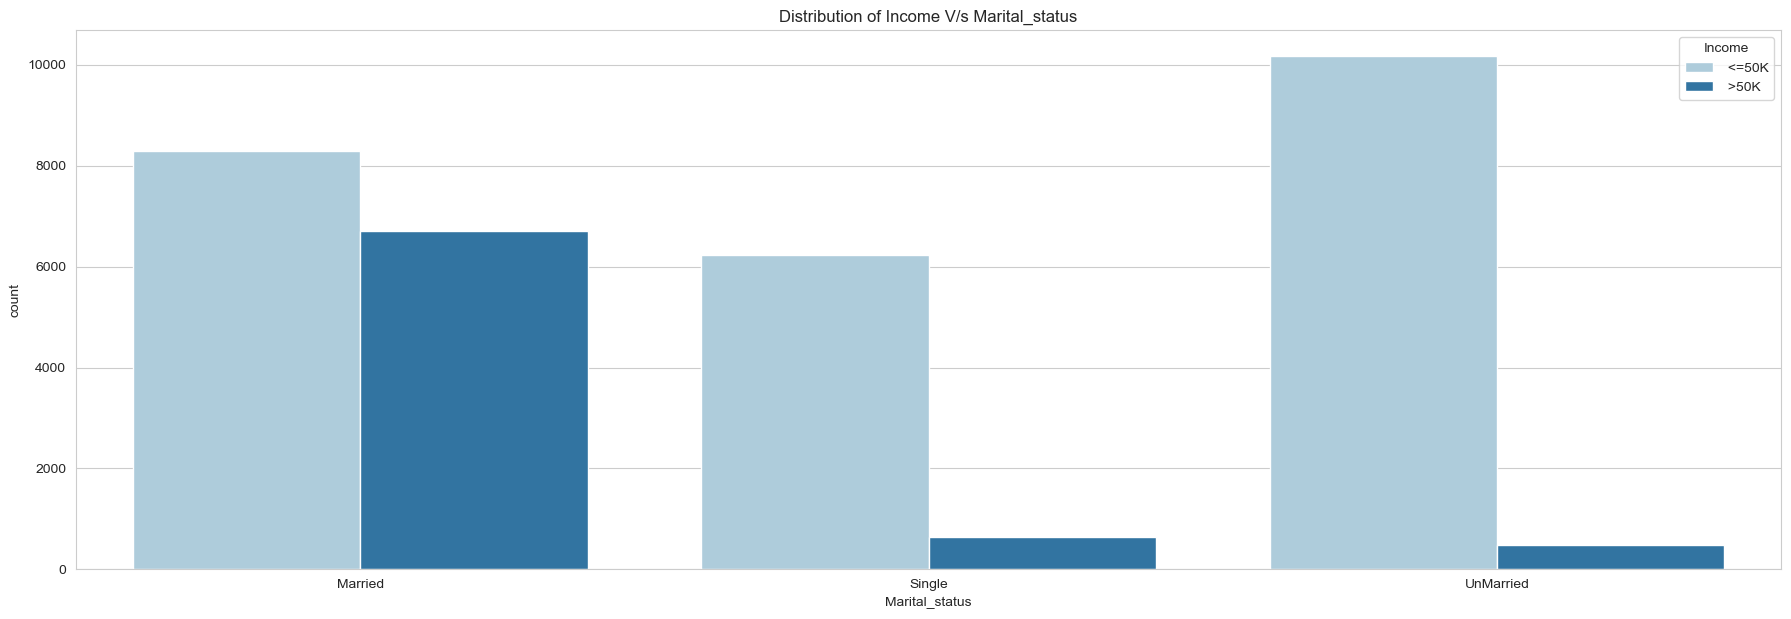

In [149]:
plt.figure(figsize=(22,7))
plt.title('Distribution of Income V/s Marital_status')
sns.countplot(x='Marital_status', hue='Income', data = df, palette="Paired")

Observation:-the marital status of being married is associated with a higher likelihood of earning >50K. Single and unmarried individuals are more likely to earn <=50K, with the unmarried category having the highest count of individuals earning <=50K.

<Axes: title={'center': 'Distribution of Income V/s Occupation'}, xlabel='Occupation', ylabel='count'>

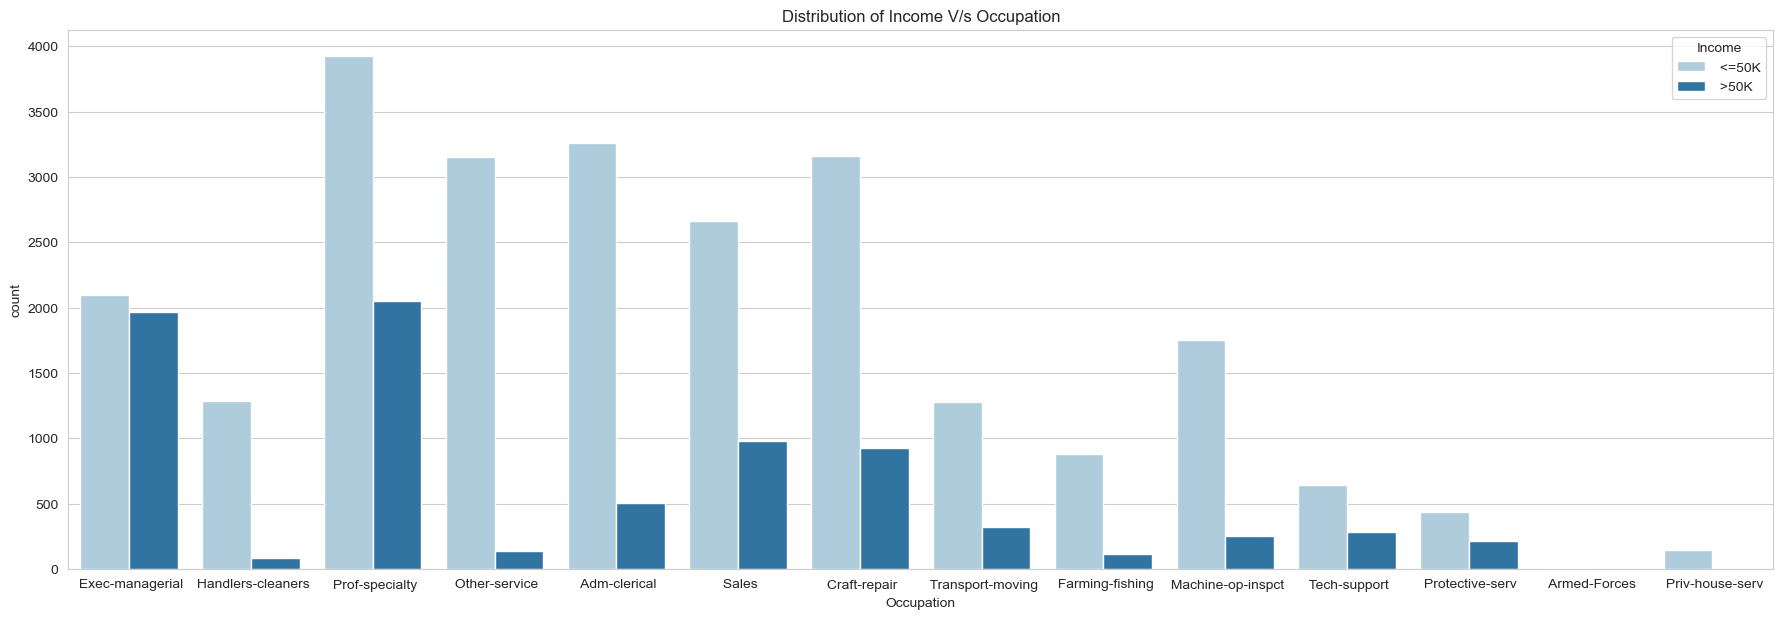

In [150]:
plt.figure(figsize=(22,7))
plt.title('Distribution of Income V/s Occupation')
sns.countplot(x='Occupation', hue='Income', data = df, palette="Paired")

Observation: managerial and professional specialty occupations are associated with higher earnings, while service and manual labor occupations tend to have lower earnings.

<Axes: title={'center': 'Distribution of Income V/s Relationalship'}, xlabel='Relationship', ylabel='count'>

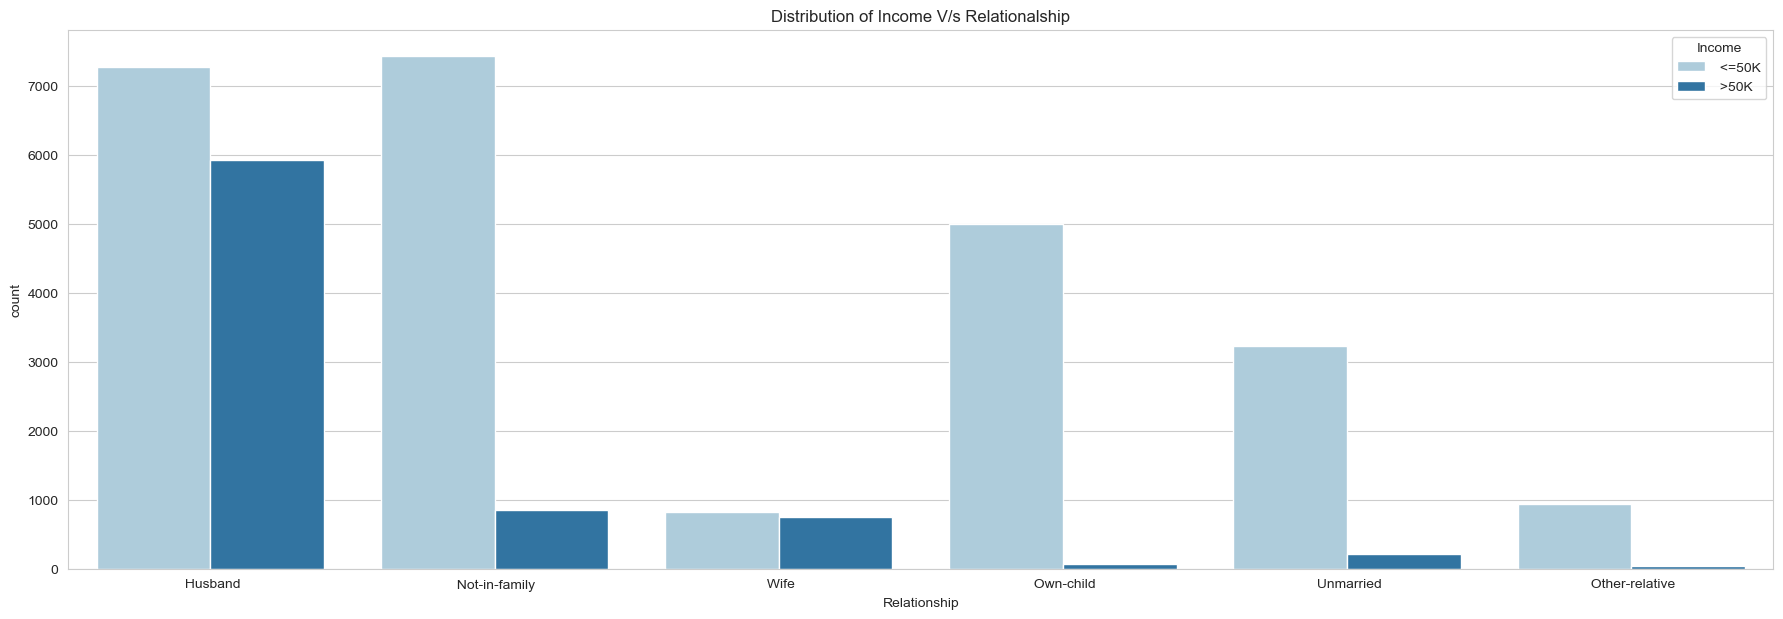

In [151]:
plt.figure(figsize=(22,7))
plt.title('Distribution of Income V/s Relationalship')
sns.countplot(x='Relationship', hue='Income', data = df, palette="Paired")

Observation: Relationship as a husband is associated with a higher likelihood of earning >50K. Not-in-family relationship category having the highest count of individuals earning <=50K followed by husband, Own-child and unmaried.

<Axes: title={'center': 'Distribution of Income V/s Race'}, xlabel='Race', ylabel='count'>

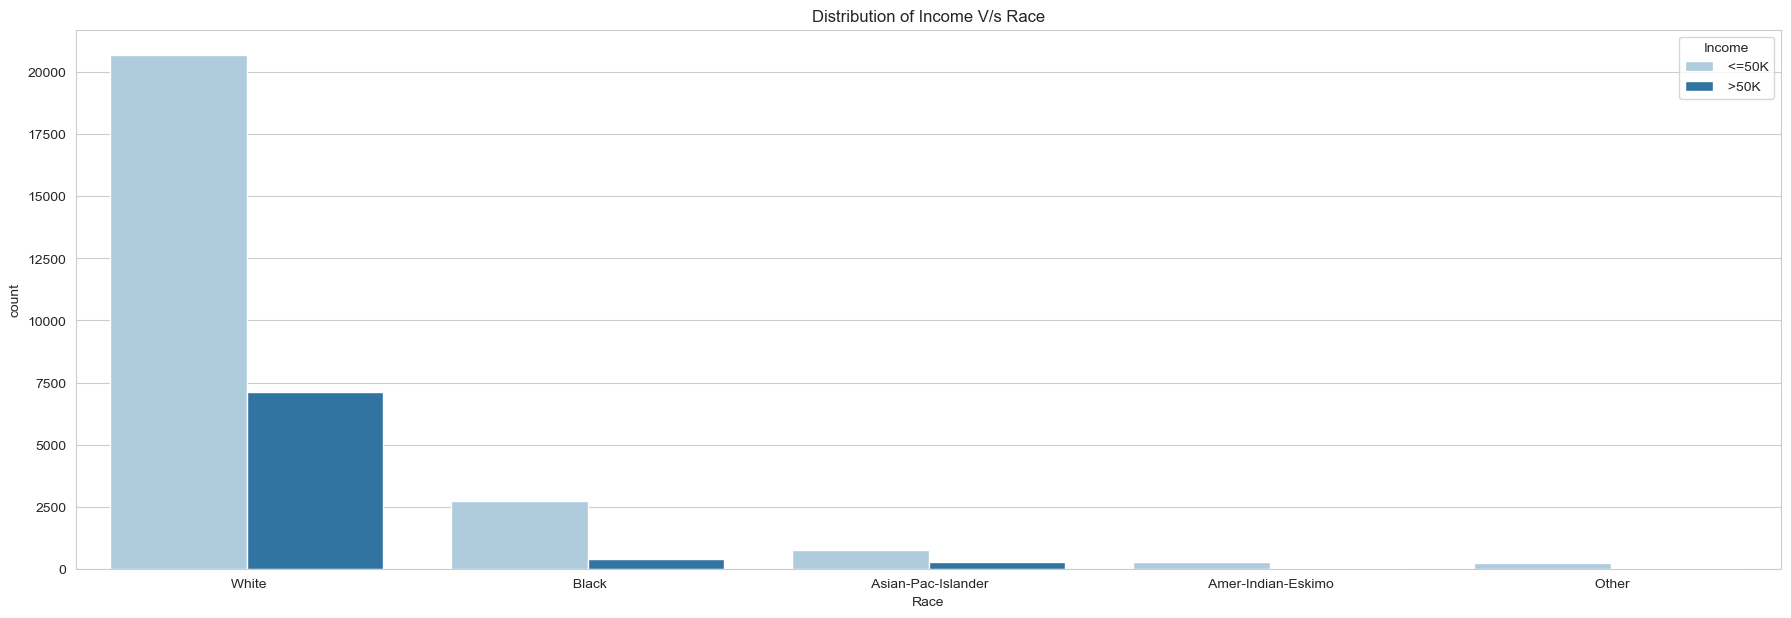

In [152]:
plt.figure(figsize=(22,7))
plt.title('Distribution of Income V/s Race')
sns.countplot(x='Race', hue='Income', data = df, palette="Paired")

<Axes: title={'center': 'Distribution of Income V/s Native_country'}, xlabel='Native_country', ylabel='count'>

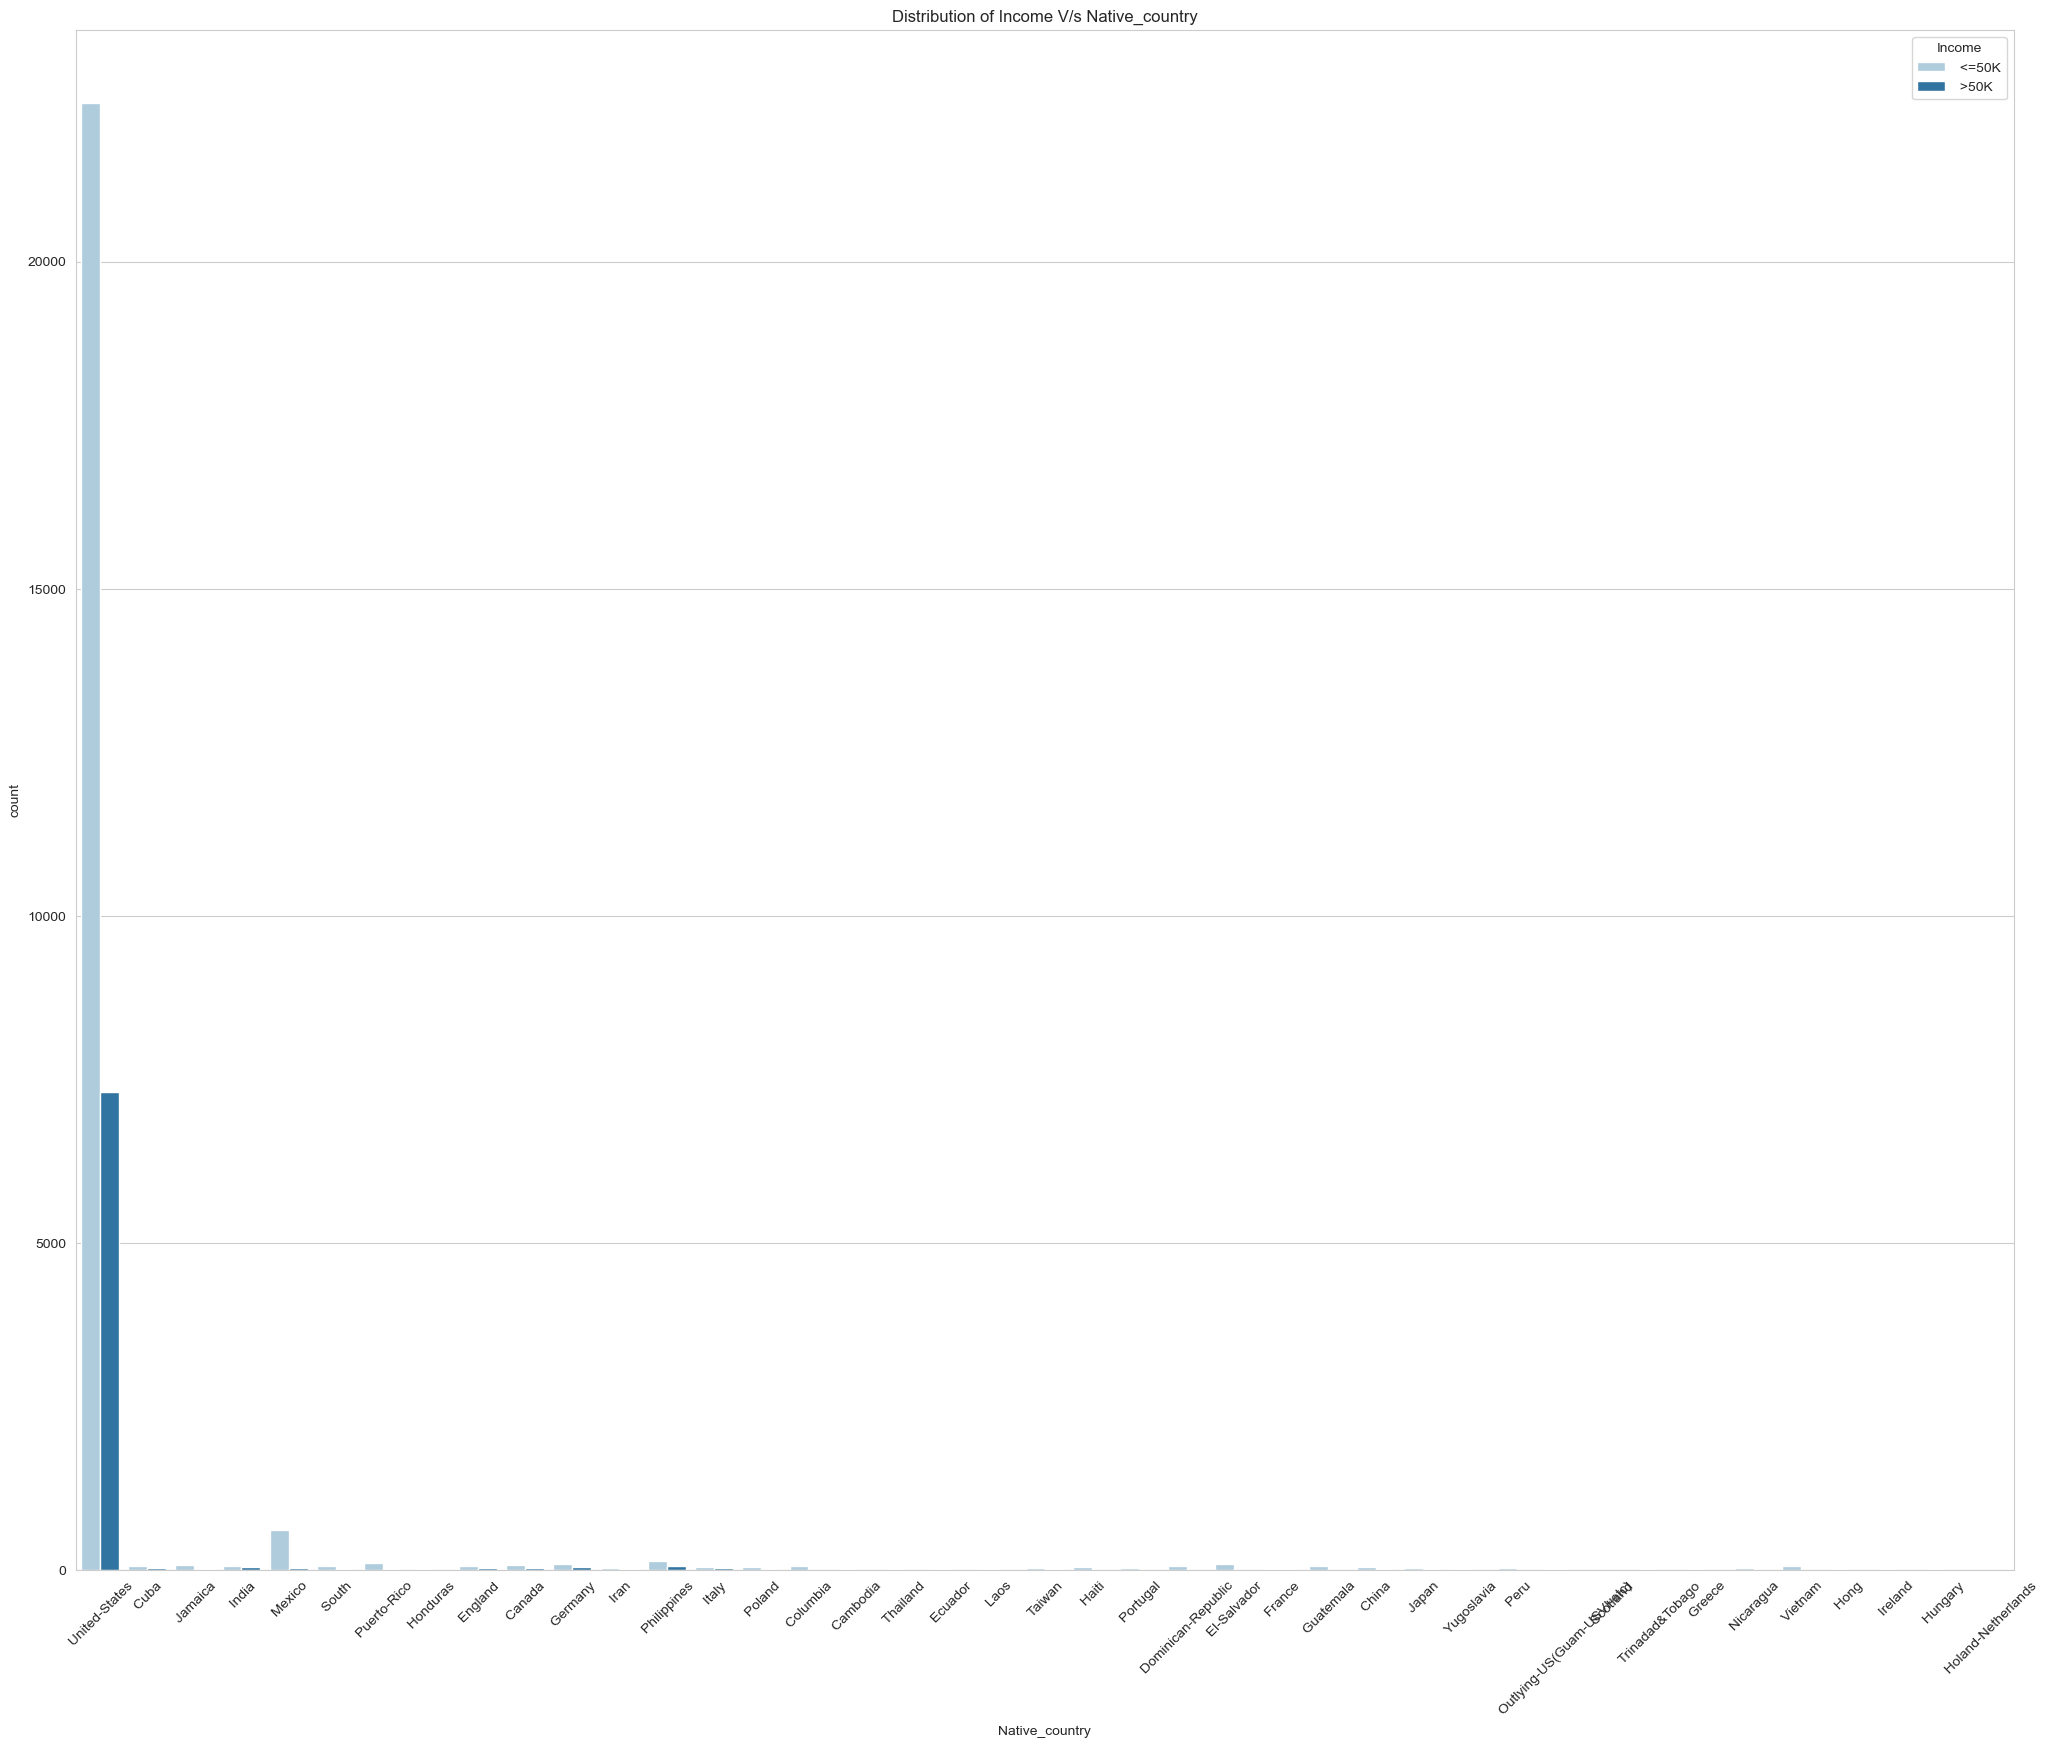

In [153]:
plt.figure(figsize=(25,20))
plt.title('Distribution of Income V/s Native_country')
plt.xticks(rotation=45)
sns.countplot(x='Native_country', hue='Income', data = df, palette="Paired")

Observations:-United states is the Native-country where the majority of individuals is earning <=50K than the individuals earning >50K and also the United -states have the highest count in both the income category than others native-countries.  

<Axes: title={'center': 'Distribution of Income V/s Sex'}, xlabel='Sex', ylabel='count'>

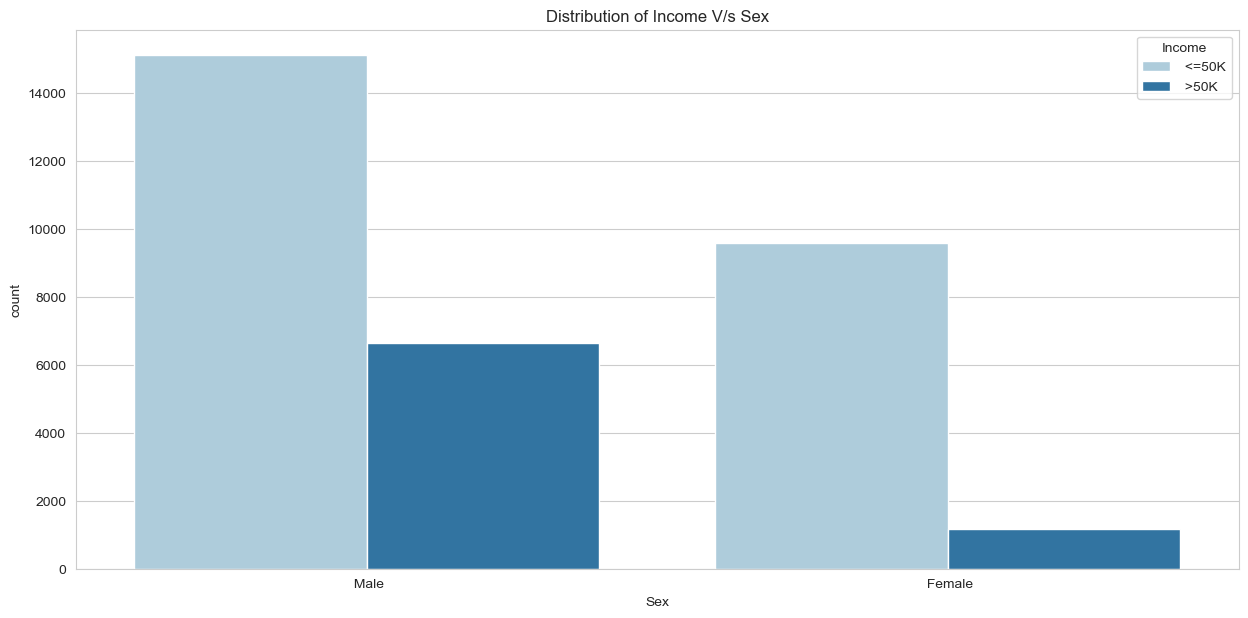

In [154]:
plt.figure(figsize=(15,7))
plt.title('Distribution of Income V/s Sex')
sns.countplot(x='Sex', hue='Income', data = df, palette="Paired")

Observations: Males are earning higher income than females and majority of males are earning <=50K Income.

<Axes: title={'center': ' Sex as per Education_num'}, xlabel='Sex', ylabel='count'>

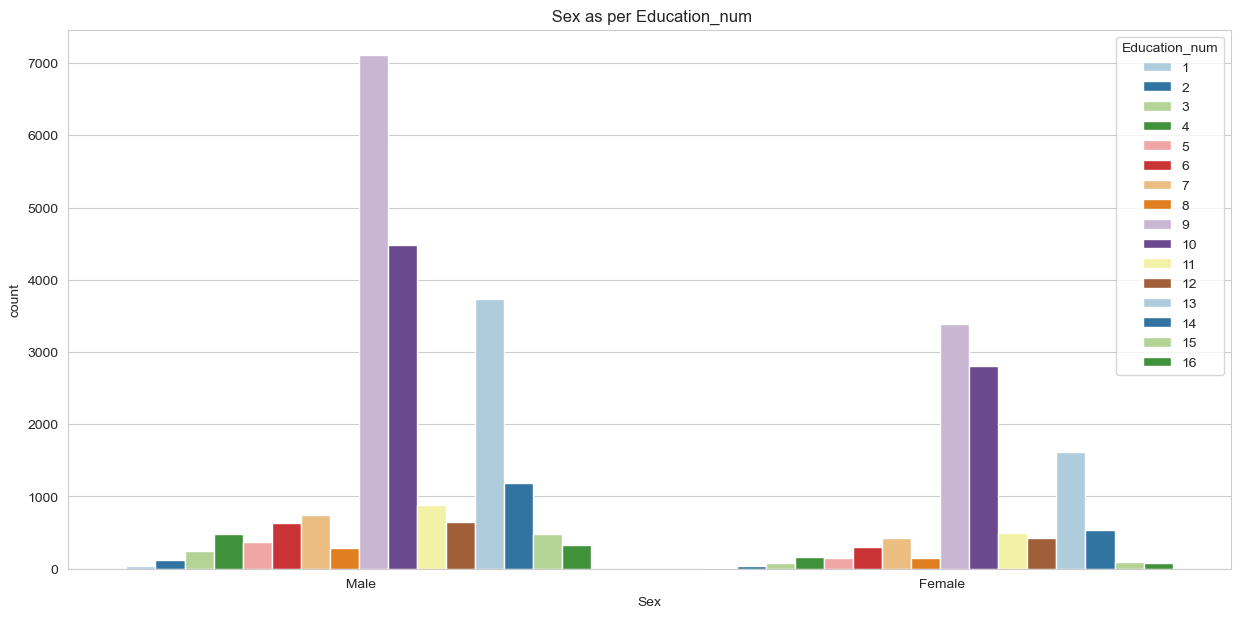

In [155]:
plt.figure(figsize=(15,7))
plt.title(' Sex as per Education_num')
sns.countplot(x='Sex', hue='Education_num', data = df, palette="Paired")

Observations:Males are more educated than females according to this dataset.

<Axes: title={'center': ' Sex as per Occupation'}, xlabel='Sex', ylabel='count'>

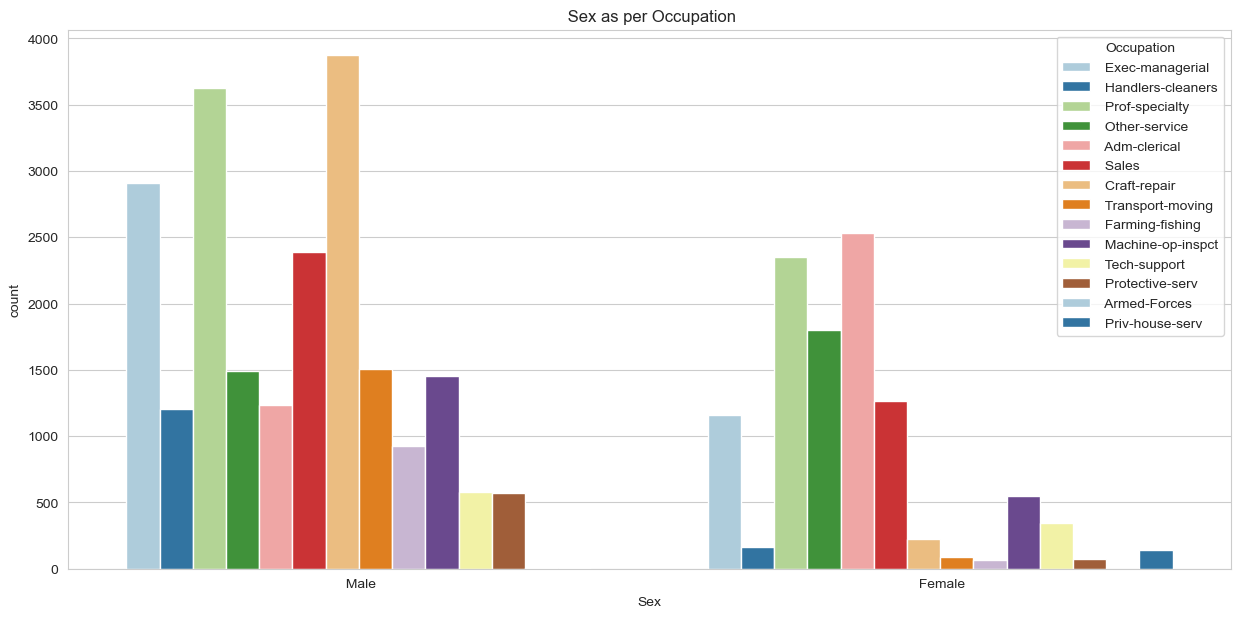

In [156]:
plt.figure(figsize=(15,7))
plt.title(' Sex as per Occupation')
sns.countplot(x='Sex', hue='Occupation', data = df, palette="Paired")

Observation: Males counts are more than female counts in each type of Occupation category.

In [157]:
#Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns:",numerical_col)
print("\n")

numerical columns: ['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']




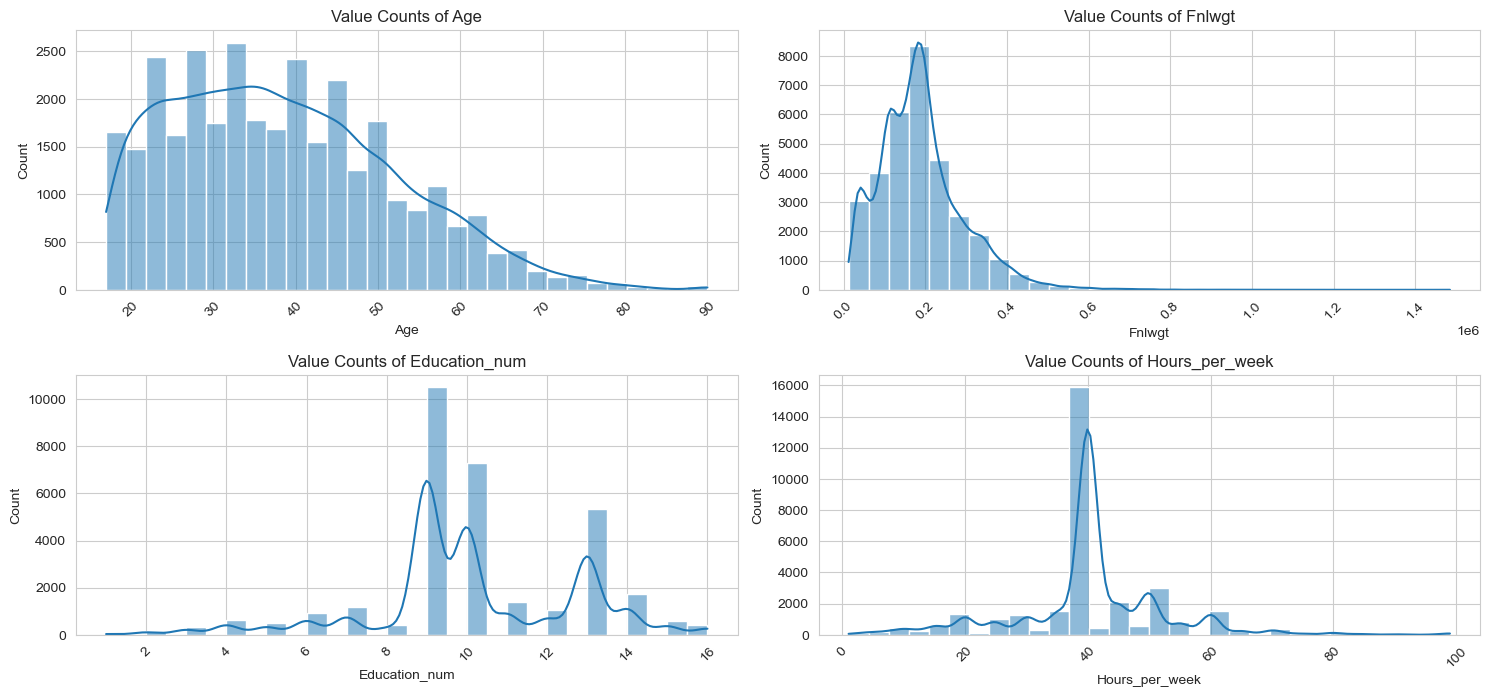

In [158]:
plt.figure(figsize=(15,10))
plotnumber=1    
for i in numerical_col:
    if plotnumber<=6:
        plt.subplot(3, 2, plotnumber)
        sns.histplot(df[i], kde=True, bins=30)
        plt.title(f'Value Counts of {i}')
        plt.xticks(rotation=45)
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()


In [159]:
#categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns:",categorical_col)
print("\n")

categorical columns: ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']




# Label Encoding

In [160]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_col:
    df[i]=le.fit_transform(df[i])


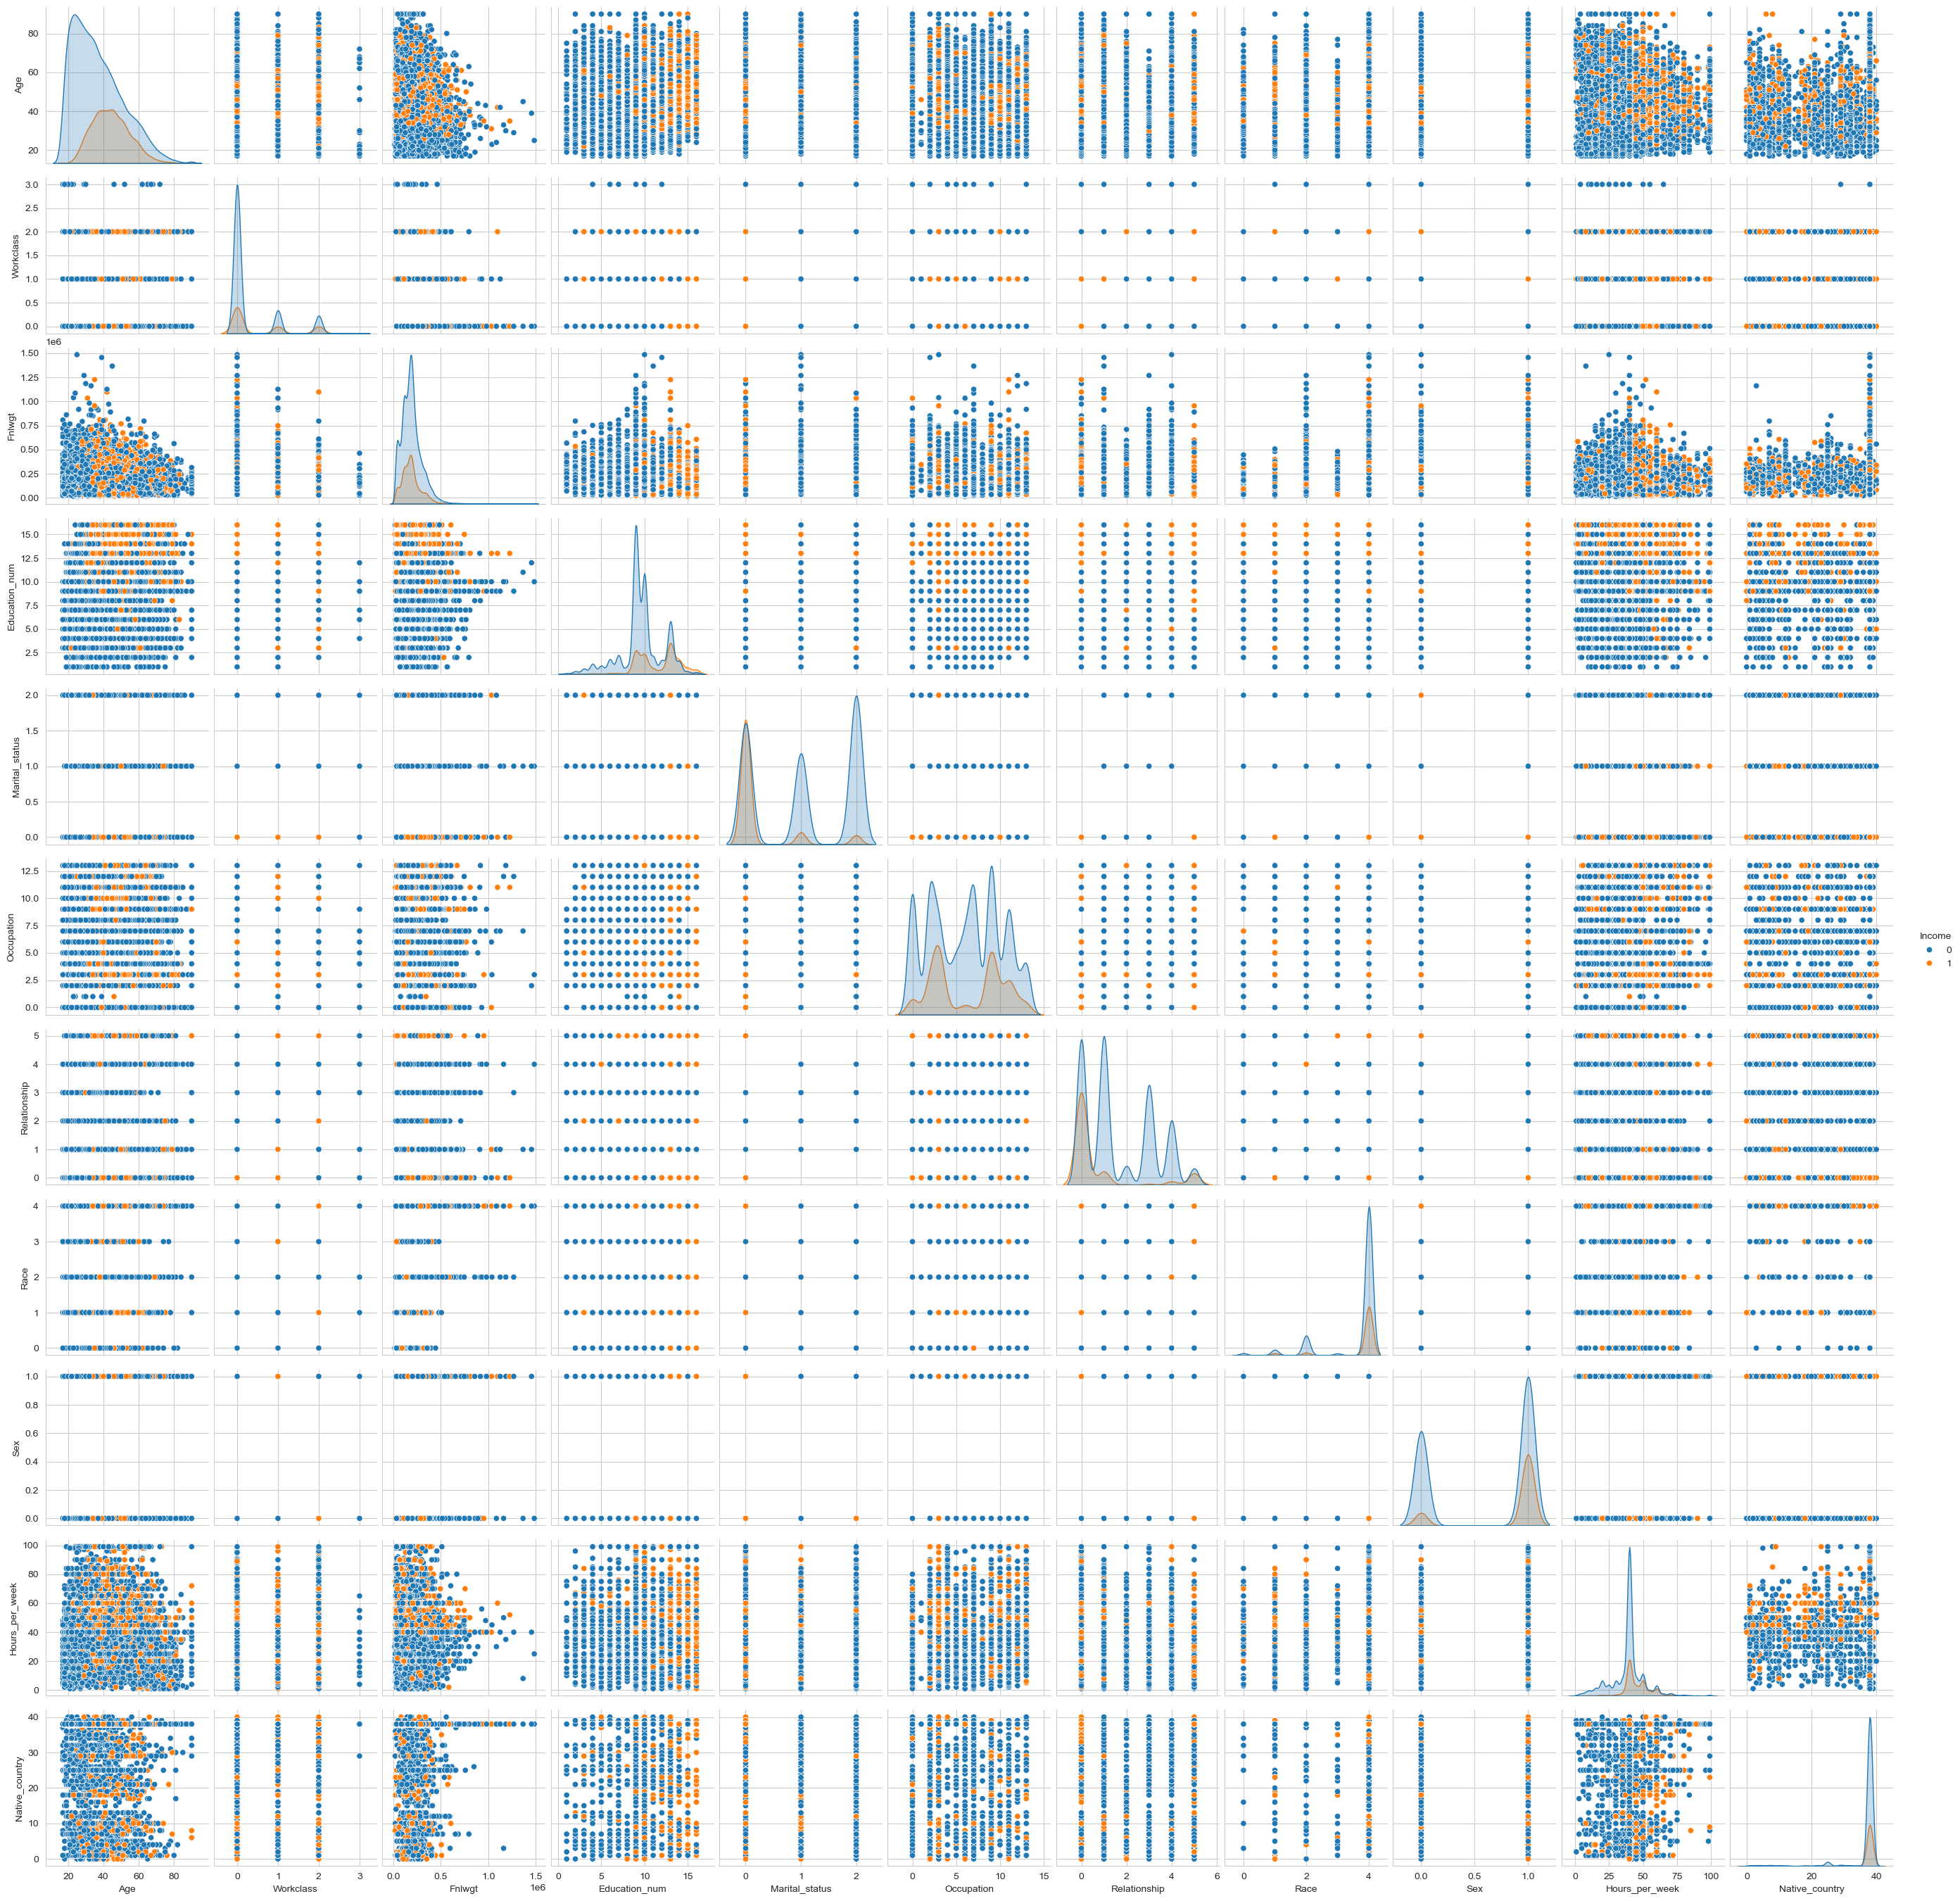

In [163]:
# Creating a pairplot of dataset
sns.pairplot(df, hue = 'Income')


In [164]:
df.corr()

Age  Workclass    Fnlwgt  Education_num  Marital_status  \
Age             1.000000   0.201533 -0.076448       0.036224       -0.464461   
Workclass       0.201533   1.000000 -0.050039       0.132924       -0.170879   
Fnlwgt         -0.076448  -0.050039  1.000000      -0.043353        0.034663   
Education_num   0.036224   0.132924 -0.043353       1.000000       -0.065887   
Marital_status -0.464461  -0.170879  0.034663      -0.065887        1.000000   
Occupation      0.001756  -0.014401 -0.000073       0.070965        0.000903   
Relationship   -0.263744  -0.119756  0.008859      -0.094424        0.451887   
Race            0.029116   0.027857 -0.021484       0.031998       -0.082270   
Sex             0.088708   0.110901  0.027113       0.012181       -0.336306   
Hours_per_week  0.068515   0.141685 -0.018900       0.148426       -0.226539   
Native_country -0.000659   0.029759 -0.063073       0.088044        0.007914   
Income          0.234039   0.128138 -0.009521       0.335299       -0.422893   

                Occupation  Relationship      Race       Sex  Hours_per_week  \
Age               0.001756     -0.263744  0.029116  0.088708        0.068515   
Workclass        -0.014401     -0.119756  0.027857  0.110901        0.141685   
Fnlwgt           -0.000073      0.008859 -0.021484  0.027113       -0.018900   
Education_num     0.070965     -0.094424  0.031998  0.012181        0.148426   
Marital_status    0.000903      0.451887 -0.082270 -0.336306       -0.226539   
Occupation        1.000000     -0.037443 -0.004789  0.047683       -0.012851   
Relationship     -0.037443      1.000000 -0.116048 -0.582593       -0.248876   
Race             -0.004789     -0.116048  1.000000  0.087464        0.041921   
Sex               0.047683     -0.582593  0.087464  1.000000        0.229190   
Hours_per_week   -0.012851     -0.248876  0.041921  0.229190        1.000000   
Native_country   -0.002124     -0.010838  0.116848  0.001745        0.006802   
Income            0.034490     -0.250955  0.071855  0.215984        0.229659   

                Native_country    Income  
Age                  -0.000659  0.234039  
Workclass             0.029759  0.128138  
Fnlwgt               -0.063073 -0.009521  
Education_num         0.088044  0.335299  
Marital_status        0.007914 -0.422893  
Occupation           -0.002124  0.034490  
Relationship         -0.010838 -0.250955  
Race                  0.116848  0.071855  
Sex                   0.001745  0.215984  
Hours_per_week        0.006802  0.229659  
Native_country        1.000000  0.022858  
Income                0.022858  1.000000

<Axes: >

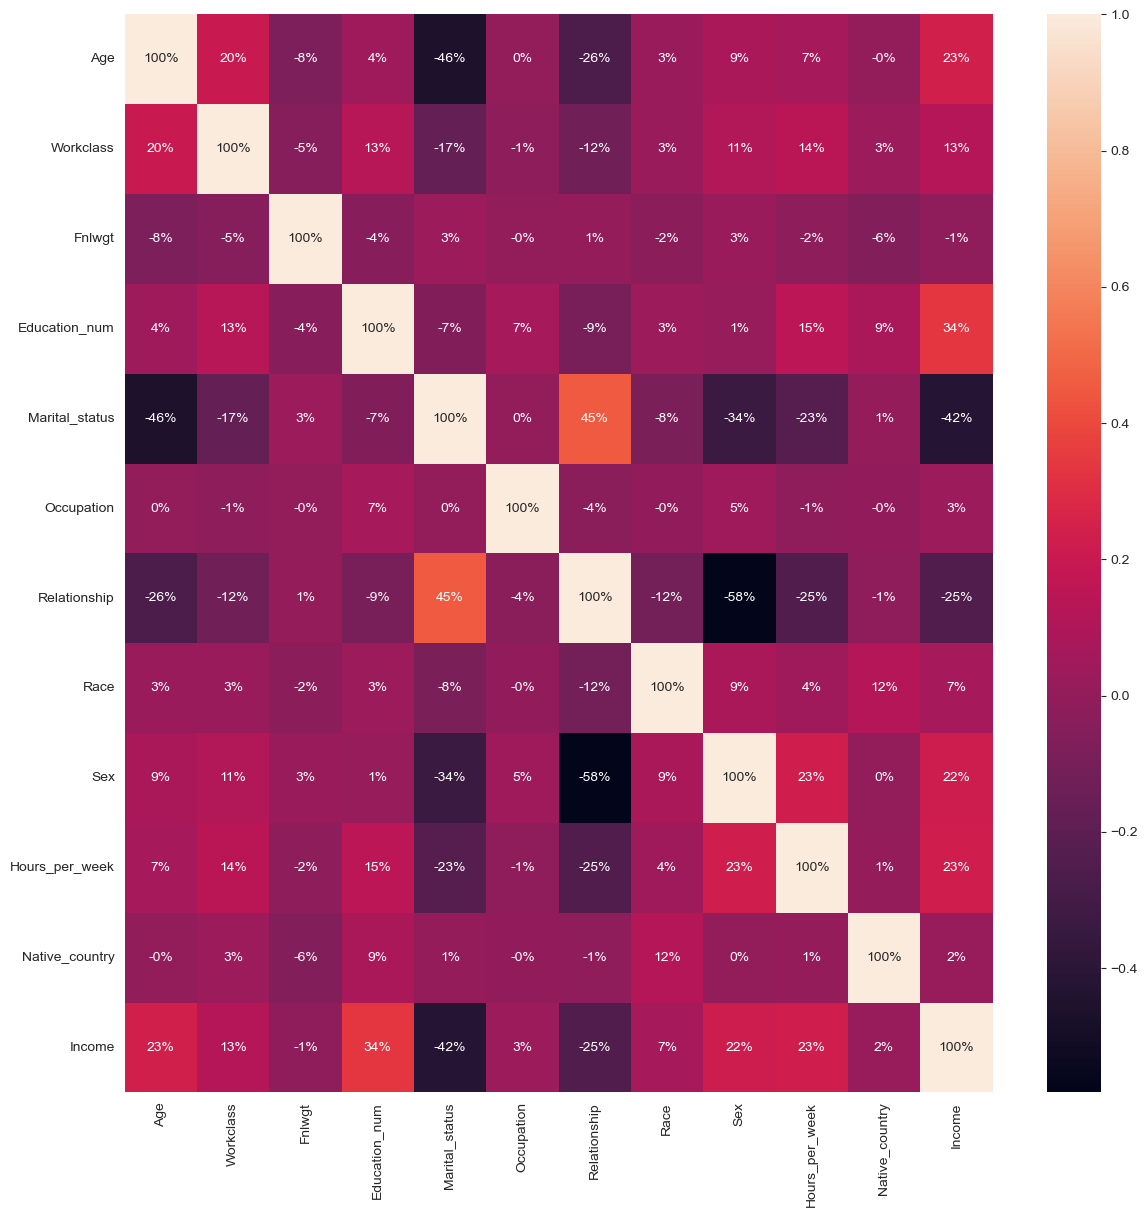

In [165]:
#Heatmap to show the correlation among the datas
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [166]:
df.describe()#for statistical summary

Age     Workclass        Fnlwgt  Education_num  \
count  32536.000000  32536.000000  3.253600e+04   32536.000000   
mean      38.585536      0.360370  1.897843e+05      10.081725   
std       13.638193      0.677588  1.055563e+05       2.571622   
min       17.000000      0.000000  1.228500e+04       1.000000   
25%       28.000000      0.000000  1.178315e+05       9.000000   
50%       37.000000      0.000000  1.783560e+05      10.000000   
75%       48.000000      0.000000  2.369932e+05      12.000000   
max       90.000000      3.000000  1.484705e+06      16.000000   

       Marital_status    Occupation  Relationship          Race           Sex  \
count    32536.000000  32536.000000  32536.000000  32536.000000  32536.000000   
mean         0.867009      6.139476      1.446552      3.665816      0.669228   
std          0.878050      3.973089      1.607087      0.848858      0.470498   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      3.000000      0.000000      4.000000      0.000000   
50%          1.000000      6.000000      1.000000      4.000000      1.000000   
75%          2.000000      9.000000      3.000000      4.000000      1.000000   
max          2.000000     13.000000      5.000000      4.000000      1.000000   

       Hours_per_week  Native_country        Income  
count    32536.000000    32536.000000  32536.000000  
mean        40.440343       36.419136      0.240933  
std         12.347079        6.053903      0.427656  
min          1.000000        0.000000      0.000000  
25%         40.000000       38.000000      0.000000  
50%         40.000000       38.000000      0.000000  
75%         45.000000       38.000000      0.000000  
max         99.000000       40.000000      1.000000

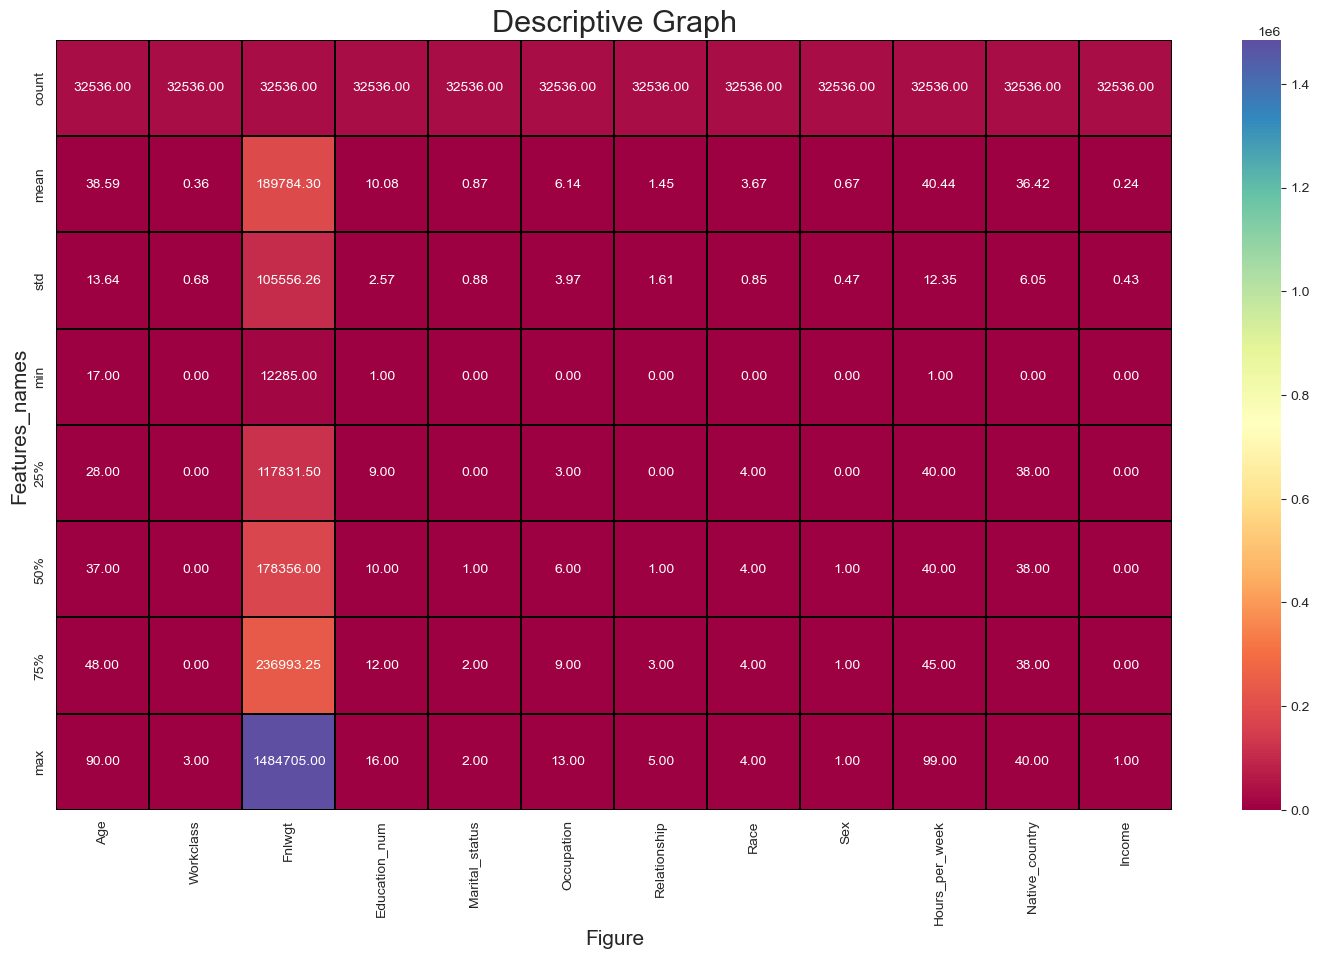

In [167]:
plt.figure(figsize=(18,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=15)
plt.ylabel('Features_names',fontsize=15)
plt.title('Descriptive Graph',fontsize=22)
plt.show()

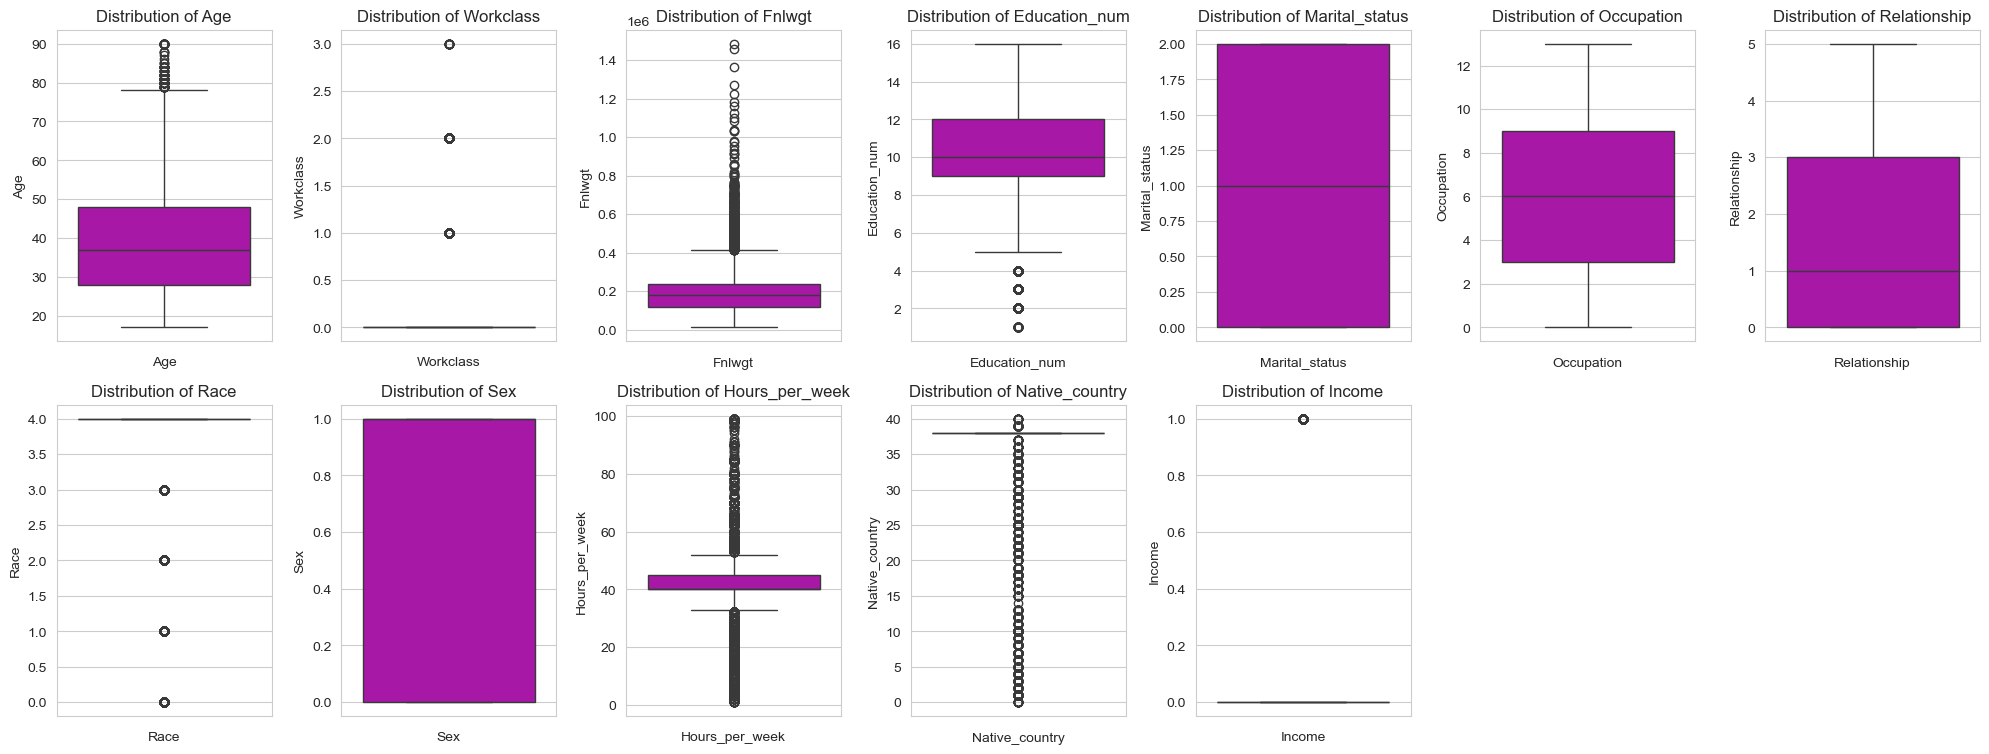

In [168]:
# checking the outliers

plt.figure(figsize=(20, 15),facecolor="white")
plotnumber=1
for i in df.columns[0:13]:
    if plotnumber<=13:
        plt.subplot(4, 7, plotnumber)
        sns.boxplot(df[i], color="m")
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

Black dots are present in many columns, it means most of the data are present outside the distribution. So we have to remove the outliers by using the zscore.

In [169]:
#Removing the Outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
print(np.where(z>3))

(array([    3,     9,    10, ..., 32508, 32526, 32528]), array([10,  9,  7, ...,  7,  7,  7]))


In [170]:
df_new=df[(z<3).all(axis=1)]
df_new

Age  Workclass  Fnlwgt  Education_num  Marital_status  Occupation  \
0       50          2   83311             13               0           3   
1       38          0  215646              9               1           5   
2       53          0  234721              7               0           5   
4       37          0  284582             14               0           3   
5       49          0  160187              5               1           7   
...    ...        ...     ...            ...             ...         ...   
32555   27          0  257302             12               0          12   
32556   40          0  154374              9               0           6   
32557   58          0  151910              9               1           0   
32558   22          0  201490              9               2           0   
32559   52          2  287927              9               0           3   

       Relationship  Race  Sex  Hours_per_week  Native_country  Income  
0                 0     4    1              13              38       0  
1                 1     4    1              40              38       0  
2                 0     2    1              40              38       0  
4                 5     4    0              40              38       0  
5                 1     2    0              16              22       0  
...             ...   ...  ...             ...             ...     ...  
32555             5     4    0              38              38       0  
32556             0     4    1              40              38       1  
32557             4     4    0              40              38       0  
32558             3     4    1              20              38       0  
32559             5     4    0              40              38       1  

[29270 rows x 12 columns]

In [171]:
print('shape before removing the outliers:',df.shape)
print('shape after removing the outliers:',df_new.shape)

shape before removing the outliers: (32536, 12)
shape after removing the outliers: (29270, 12)


In [172]:
#%data loss calculation
loss_percent=((32536-29270)/32576)*100
print(loss_percent)

10.025785854616895


10% data loss is not acceptable,so we will not go with outlier removal.

In [173]:
df1=df_new

In [174]:
#Checking the skewness in data
df1.skew()

Age               0.466086
Workclass         1.631383
Fnlwgt            0.630355
Education_num    -0.134084
Marital_status    0.257211
Occupation        0.012364
Relationship      0.788592
Race             -2.621889
Sex              -0.716732
Hours_per_week   -0.347226
Native_country   -5.527759
Income            1.197756
dtype: float64

In [175]:
#Removing skewness using'log1p' method
df1['Fnlwgt']=np.log1p(df1['Fnlwgt'])

In [176]:
df1.skew()

Age               0.466086
Workclass         1.631383
Fnlwgt           -0.955216
Education_num    -0.134084
Marital_status    0.257211
Occupation        0.012364
Relationship      0.788592
Race             -2.621889
Sex              -0.716732
Hours_per_week   -0.347226
Native_country   -5.527759
Income            1.197756
dtype: float64

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [178]:
x=df1.iloc[:,0:-1]
x

Age  Workclass     Fnlwgt  Education_num  Marital_status  Occupation  \
0       50          2  11.330348             13               0           3   
1       38          0  12.281398              9               1           5   
2       53          0  12.366157              7               0           5   
4       37          0  12.558780             14               0           3   
5       49          0  11.984103              5               1           7   
...    ...        ...        ...            ...             ...         ...   
32555   27          0  12.458010             12               0          12   
32556   40          0  11.947140              9               0           6   
32557   58          0  11.931050              9               1           0   
32558   22          0  12.213500              9               2           0   
32559   52          2  12.570466              9               0           3   

       Relationship  Race  Sex  Hours_per_week  Native_country  
0                 0     4    1              13              38  
1                 1     4    1              40              38  
2                 0     2    1              40              38  
4                 5     4    0              40              38  
5                 1     2    0              16              22  
...             ...   ...  ...             ...             ...  
32555             5     4    0              38              38  
32556             0     4    1              40              38  
32557             4     4    0              40              38  
32558             3     4    1              20              38  
32559             5     4    0              40              38  

[29270 rows x 11 columns]

In [179]:
x.shape[1]

11

In [180]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    vif["Features"]=x.columns
    print(vif)

In [181]:
vif_cal()

    VIF Values        Features
0    12.216313             Age
1     1.388904       Workclass
2   158.706410          Fnlwgt
3    19.708205   Education_num
4     3.110730  Marital_status
5     3.377990      Occupation
6     3.168405    Relationship
7    39.150510            Race
8     4.792513             Sex
9    15.570320  Hours_per_week
10  164.162617  Native_country


In [182]:
df1.drop(['Fnlwgt'],axis=1,inplace=True)

In [183]:
x=df1.iloc[:,:-1]
x

Age  Workclass  Education_num  Marital_status  Occupation  \
0       50          2             13               0           3   
1       38          0              9               1           5   
2       53          0              7               0           5   
4       37          0             14               0           3   
5       49          0              5               1           7   
...    ...        ...            ...             ...         ...   
32555   27          0             12               0          12   
32556   40          0              9               0           6   
32557   58          0              9               1           0   
32558   22          0              9               2           0   
32559   52          2              9               0           3   

       Relationship  Race  Sex  Hours_per_week  Native_country  
0                 0     4    1              13              38  
1                 1     4    1              40              38  
2                 0     2    1              40              38  
4                 5     4    0              40              38  
5                 1     2    0              16              22  
...             ...   ...  ...             ...             ...  
32555             5     4    0              38              38  
32556             0     4    1              40              38  
32557             4     4    0              40              38  
32558             3     4    1              20              38  
32559             5     4    0              40              38  

[29270 rows x 10 columns]

In [184]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    vif["Features"]=x.columns
    print(vif)

In [185]:
vif_cal()

   VIF Values        Features
0   11.941990             Age
1    1.382013       Workclass
2   19.664275   Education_num
3    3.055040  Marital_status
4    3.369041      Occupation
5    3.097407    Relationship
6   37.450476            Race
7    4.704041             Sex
8   15.204506  Hours_per_week
9   76.526385  Native_country


# Feature Scaling

In [186]:
#Using StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.87104548,  2.45183627,  1.17470752, ...,  0.70392029,
        -2.42680846,  0.18464425],
       [-0.02697856, -0.53086349, -0.46155912, ...,  0.70392029,
        -0.01096817,  0.18464425],
       [ 1.09555149, -0.53086349, -1.27969244, ...,  0.70392029,
        -0.01096817,  0.18464425],
       ...,
       [ 1.46972817, -0.53086349, -0.46155912, ..., -1.42061538,
        -0.01096817,  0.18464425],
       [-1.22434395, -0.53086349, -0.46155912, ...,  0.70392029,
        -1.8004795 ,  0.18464425],
       [ 1.02071615,  2.45183627, -0.46155912, ..., -1.42061538,
        -0.01096817,  0.18464425]])

In [187]:
y=df1['Income']

In [188]:
y.value_counts()

Income
0    22154
1     7116
Name: count, dtype: int64

label is imbalanced

In [189]:
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [190]:
y1.value_counts()

Income
0    22154
1    22154
Name: count, dtype: int64

Now, data is balanced... we can build machine learning Classification Models.

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Finding Random State

In [192]:
#Finding best Random state
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    lgr=LogisticRegression()
    lgr.fit(x_train,y_train)
    predlgr=lgr.predict(x_test)
    acc=accuracy_score(y_test,predlgr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.801549687805612 on Random_state 423


# Build the Model

In [193]:
#Model Building
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=423)

In [194]:
model=[LogisticRegression(),DecisionTreeClassifier(),ExtraTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),BaggingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    
    print("Accuracy of",m,"is:   ",accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print()
    print("Cross Validation of",m," :")
    scr=cross_val_score(m,x1,y1,cv=5,scoring='accuracy')
    print("score mean:",scr.mean())
    print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predm)-scr.mean())

    print()
    print()
    print("--------------------------------------------------------------------------")   

Accuracy of LogisticRegression() is:    0.801549687805612
[[5026 1639]
 [ 999 5629]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      6665
           1       0.77      0.85      0.81      6628

    accuracy                           0.80     13293
   macro avg       0.80      0.80      0.80     13293
weighted avg       0.80      0.80      0.80     13293


Cross Validation of LogisticRegression()  :
score mean: 0.7927688831223196
Difference between accuracy score and cross validation score is 0.008780804683292343


--------------------------------------------------------------------------
Accuracy of DecisionTreeClassifier() is:    0.8326186714812307
[[5618 1047]
 [1178 5450]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      6665
           1       0.84      0.82      0.83      6628

    accuracy                           0.83     13293
   macro avg       0.83      0.83      0.8

RandomForestClassifier model has the highest accuracy which is 86.73% (this may be due to overfitting). so we also checked the cross validation of each model for actual accuracy. After Cross Validation, we found out that the minimum difference between the accuracy score and cross validation score is given by Bagging Classifier(). Final model is Bagging Classifier which has the 85.45% actual accuracy (accuracy score).

# Without Hyperparameter Tuning

In [197]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

bagg=BaggingClassifier()
bagg.fit(x_train,y_train)
predbagg=bagg.predict(x_test)
print("Training accuracy: ",bagg.score(x_train,y_train))

roc_auc = roc_auc_score(y_test,predbagg)
print('ROC AUC score: ',roc_auc)

    
print("Testing Accuracy of Bagging Classifier is:   ",accuracy_score(y_test,predbagg))
print("Confusion Matrix: \n ",confusion_matrix(y_test,predbagg))
print("Classification Report: \n",classification_report(y_test,predbagg))

print("Cross Validation of Bagging Classifier :")
scr=cross_val_score(bagg,x1,y1,cv=5,scoring='accuracy')
print("score mean:",scr.mean())
print("Difference between accuracy score and cross validation score of Bagging Classifier is", accuracy_score(y_test, predm)-scr.mean())



Training accuracy:  0.967273899725939
ROC AUC score:  0.8547141387036561
Testing Accuracy of Bagging Classifier is:    0.854735575114722
Confusion Matrix: 
  [[5748  917]
 [1014 5614]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      6665
           1       0.86      0.85      0.85      6628

    accuracy                           0.85     13293
   macro avg       0.85      0.85      0.85     13293
weighted avg       0.85      0.85      0.85     13293

Cross Validation of Bagging Classifier :
score mean: 0.8540690950694636
Difference between accuracy score and cross validation score of Bagging Classifier is -0.00031147827867150646


After Cross Validation, we found out that the minimum difference between the accuracy score and cross validation score is .0003.

# With HyperParameter Tuning

In [198]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Setting values for the parameters


parameters = {
    'n_estimators' :[100, 300, 500, 800, 1200],
    #'max_depth' : [1, 2, 3, 4, 5,10,15,25,30],
    'max_samples' : [0.05, 0.1, 0.5, 1, 5, 10, 25, 50, 100 ],
    'max_features' :[1, 2, 5, 10, 13]
}

grid_search = GridSearchCV(BaggingClassifier(), parameters,cv = 3, verbose = 1, n_jobs = -1)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
{'max_features': 5, 'max_samples': 0.5, 'n_estimators': 800}
0.87557622981894


In [199]:
from sklearn.metrics import f1_score

# Fitting Bagging Classifier with best Hyper parameters

In [200]:
#Fitting the bagging model with the best hyper parameters obtained through GridSearchCV
FinalModel=BaggingClassifier(n_estimators=800, max_features=5, max_samples= 0.5)
FinalModel.fit(x_train,y_train)
pred=FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy score:',acc*100)
print('F1 score:', round(f1_score(y_test, pred) * 100, 2))

Accuracy score: 88.16670428044836
F1 score: 88.32


accuracy is increased by 3%

In [215]:
#AUC ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

FinalModel.fit(x_train,y_train)
y_pred_prob=FinalModel.predict_proba(x_test)[:,1]

fpr_bag,tpr_bag,thre_bag = roc_curve(y_test,predbagg)
fpr_bag1,tpr_bag1,thre_bag1 = roc_curve(y_test,pred)


In [216]:
y_pred_prob

array([0.1393587 , 0.31574763, 0.74169067, ..., 0.70849751, 0.61981204,
       0.62769765])

In [217]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
print("fpr:",fpr)
print("tpr:",tpr)
print("thresholds:",thresholds)

fpr: [0.         0.         0.         ... 0.99894974 0.99924981 1.        ]
tpr: [0.00000000e+00 1.50875075e-04 2.62522631e-02 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
thresholds: [1.99570436e+00 9.95704361e-01 9.62921602e-01 ... 9.72343767e-04
 9.65343530e-04 4.67110483e-04]


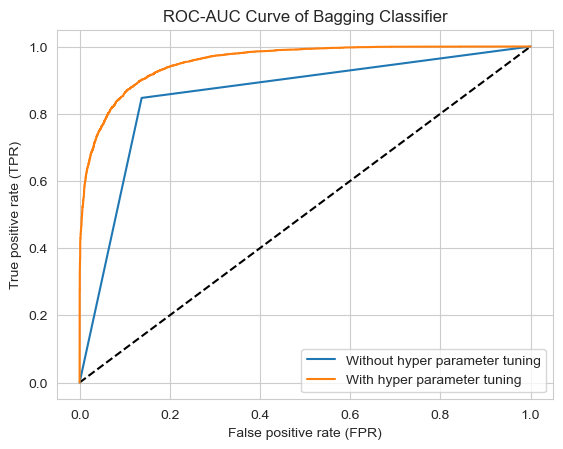

In [218]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_bag,tpr_bag,label="Without hyper parameter tuning")
plt.plot(fpr,tpr,label='With hyper parameter tuning')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('ROC-AUC Curve of Bagging Classifier')
plt.legend()
plt.show()

In [219]:
auc_score=roc_auc_score(y_test,FinalModel.predict(x_test))
print(auc_score)

0.8820208522257299


The AUC-ROC curve helps us to visualize how well our machine learning classifier is performing.

Observations & Conclusions:

From the ROC curve we can see that after hyperparameter tuning the accuracy of the model has increased to a certain extent against the one when we used default hyperparameters.

In [220]:
import pickle
filename='census_income_classification.pkl'
pickle.dump(FinalModel,open(filename,'wb'))

In [221]:
import pickle
loaded_model=pickle.load(open('census_income_classification.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

88.19679530580005


In [222]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=("predicted","original"))
conclusion

0      1      2      3      4      5      6      7      8      \
predicted      0      0      1      1      0      1      1      1      0   
original       0      0      0      1      0      1      1      1      0   

           9      ...  13283  13284  13285  13286  13287  13288  13289  13290  \
predicted      0  ...      0      1      1      0      1      1      1      1   
original       0  ...      0      1      1      0      1      1      1      1   

           13291  13292  
predicted      1      1  
original       0      1  

[2 rows x 13293 columns]

Conclusion:

In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier , bagging classifier and Ada Boost classifier.

A hyperparameter tuned Bagging classifier gives the highest accuracy score of 88.16 and f1 score of 88.32.